In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV



Memory Reduction

In [22]:
def reduce_memo(df):
    for col in df.columns:
        if df[col].dtype =="float64":
            df[col]=df[col].astype('float32')

        elif df[col].dtype==('int64'):
            df[col]=df[col].astype('int32')
    return df

LOAD THE DATA

In [23]:
departments=pd.read_csv(r"C:\Users\Acer Nitro\Downloads\archive\departments.csv")
orders=pd.read_csv(r"C:\Users\Acer Nitro\Downloads\archive\orders.csv")
order_product=pd.read_csv(r"C:\Users\Acer Nitro\Downloads\archive\order_products__prior.csv")
product=pd.read_csv(r"C:\Users\Acer Nitro\Downloads\archive\products.csv")
aisle=pd.read_csv(r"C:\Users\Acer Nitro\Downloads\archive\aisles.csv")

In [24]:
orders= reduce_memo(orders)
departments=reduce_memo(departments)
order_product=reduce_memo(order_product)
product=reduce_memo(product)
aisle=reduce_memo(aisle)

Look at the Data

In [6]:
aisle

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [7]:
order_product.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


We will join our data into one df

In [25]:
complete_df=pd.merge(order_product,product,how='inner',on='product_id')
complete_df=pd.merge(complete_df,departments,how='inner',on='department_id')
complete_df=pd.merge(complete_df,aisle,how='inner',on='aisle_id')
complete_df=pd.merge(complete_df,orders,how='inner',on='order_id')
complete_df.head()
sample_df=complete_df.sample(200000,random_state=42)

EDA


Look at data

In [9]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   product_id              int32  
 2   add_to_cart_order       int32  
 3   reordered               int32  
 4   product_name            object 
 5   aisle_id                int32  
 6   department_id           int32  
 7   department              object 
 8   aisle                   object 
 9   user_id                 int32  
 10  eval_set                object 
 11  order_number            int32  
 12  order_dow               int32  
 13  order_hour_of_day       int32  
 14  days_since_prior_order  float32
dtypes: float32(1), int32(10), object(4)
memory usage: 2.3+ GB


Summary of Data

In [10]:
complete_df.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.035642e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01,7.121430e+01,9.921906e+00,1.029372e+05,1.714205e+01,2.738818e+00,1.342498e+01,1.110406e+01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01,3.820302e+01,6.281156e+00,5.946648e+04,1.753504e+01,2.090049e+00,4.246365e+00,8.377106e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.142100e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01


Distrubution of days since prior order

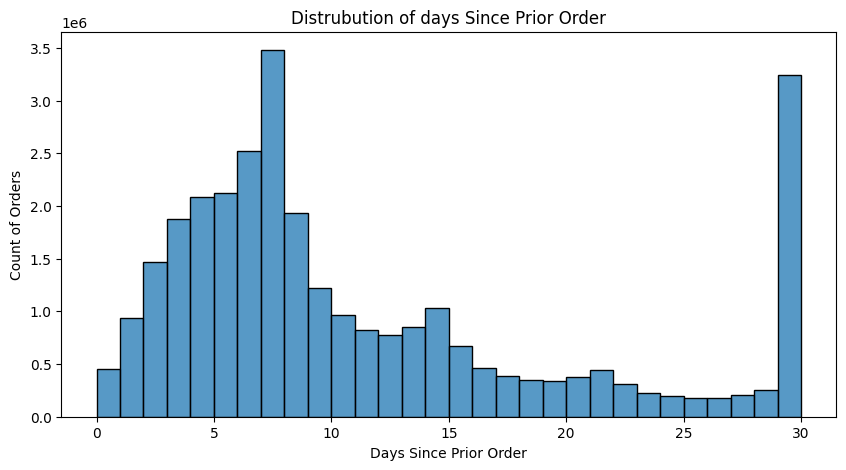

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(complete_df['days_since_prior_order'],bins=30,kde=False)
plt.title("Distrubution of days Since Prior Order")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Count of Orders")
plt.show()

Top 30 Product Orderd

Text(0.5, 1.0, 'Top 30 Product Ordred')

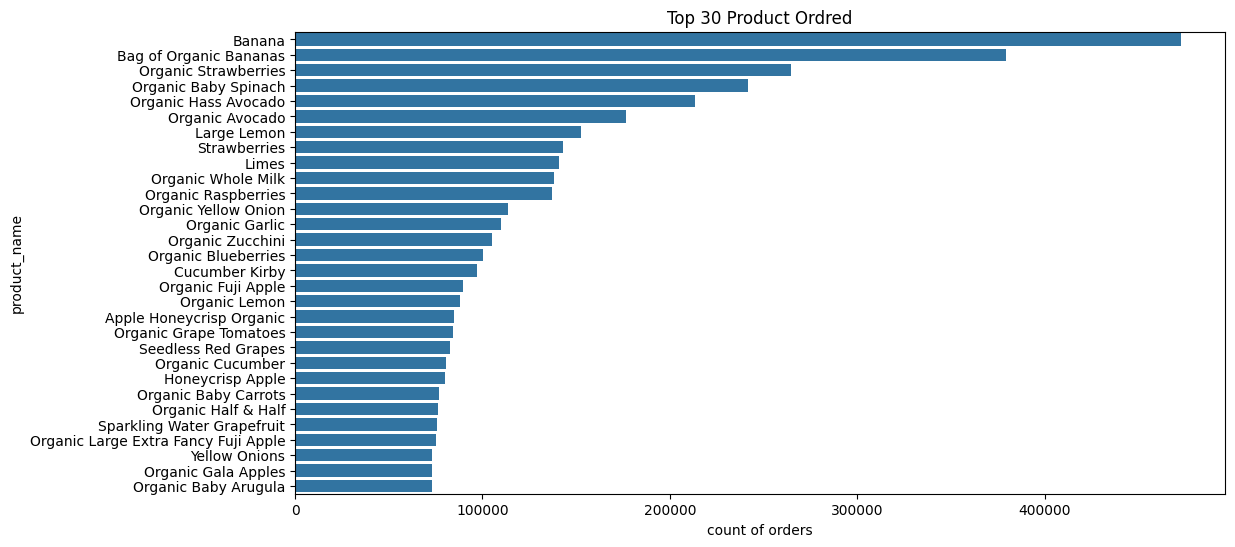

In [12]:
most_ordered=complete_df['product_name'].value_counts().head(30)
plt.figure(figsize=(12,6))
sns.barplot(x=most_ordered,y=most_ordered.index)
plt.xlabel("count of orders")
plt.title("Top 30 Product Ordred")

Day Of Week Plot

<Axes: xlabel='order_dow', ylabel='Count'>

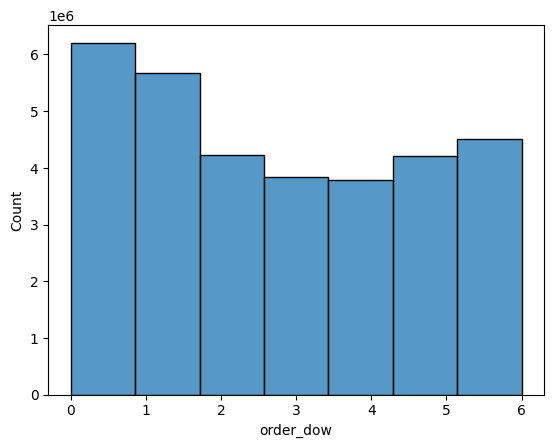

In [13]:
sns.histplot(complete_df['order_dow'],bins=7,kde=False)

Order Per department

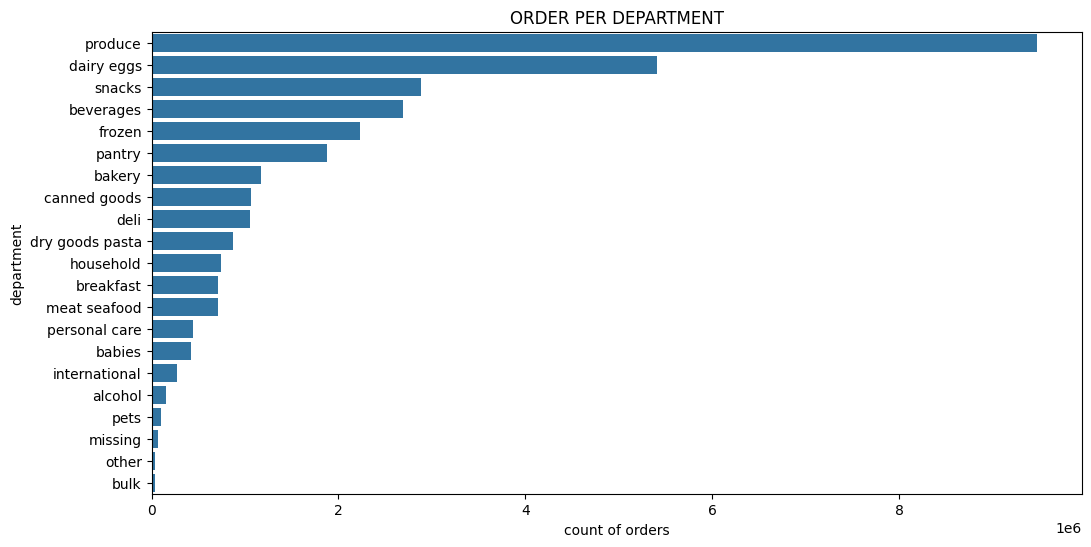

In [14]:
top_departments=complete_df['department'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=top_departments,y=top_departments.index)
plt.xlabel("count of orders")
plt.title("ORDER PER DEPARTMENT")
plt.show()

Number of orders per users

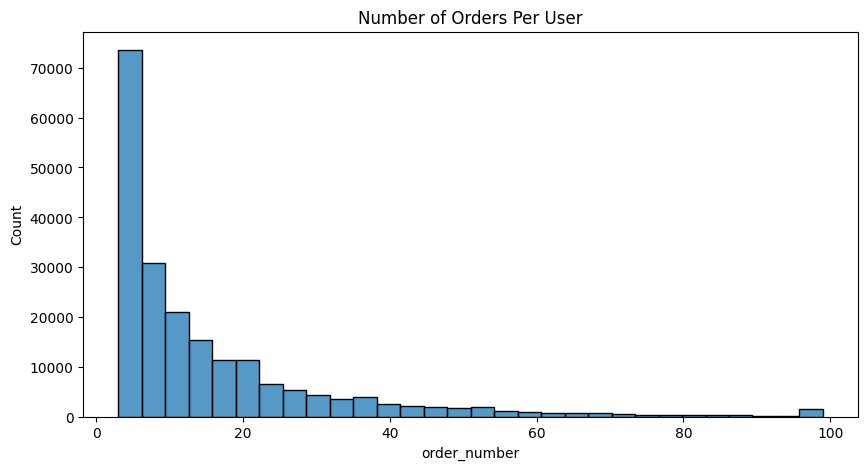

In [15]:
user_order=complete_df.groupby('user_id')['order_number'].max()
plt.figure(figsize=(10,5))
sns.histplot(user_order,bins=30)
plt.title("Number of Orders Per User")
plt.show()


Reorderd Vs orderd


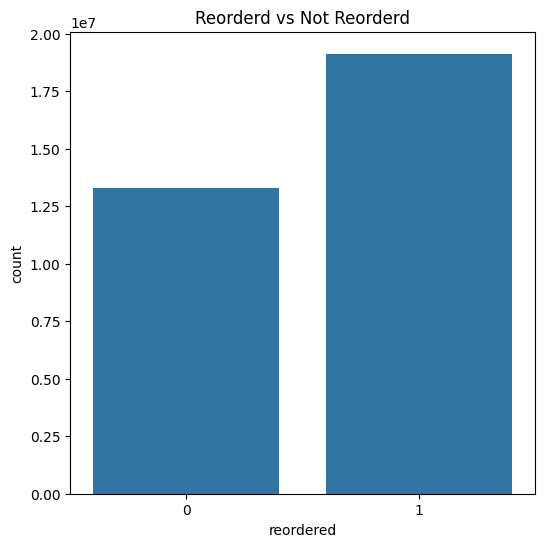

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x=complete_df['reordered'])
plt.title("Reorderd vs Not Reorderd")
plt.show()

The Top 20 aisle

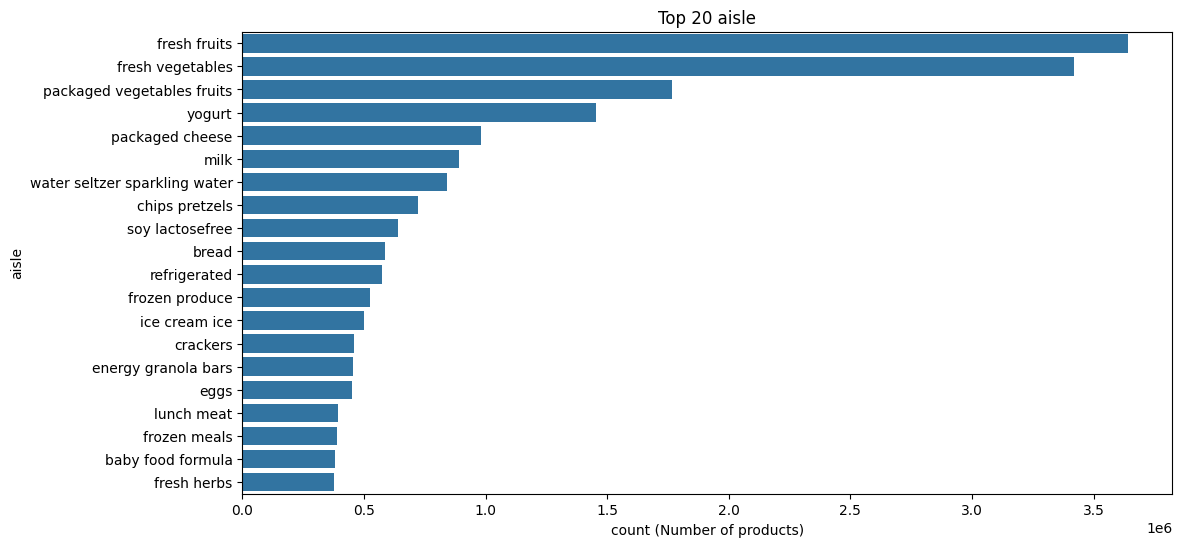

In [17]:
top_aisle=complete_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_aisle,y=top_aisle.index)
plt.title("Top 20 aisle")
plt.xlabel("count (Number of products)")
plt.ylabel("aisle")
plt.show()

REorder VS Order number

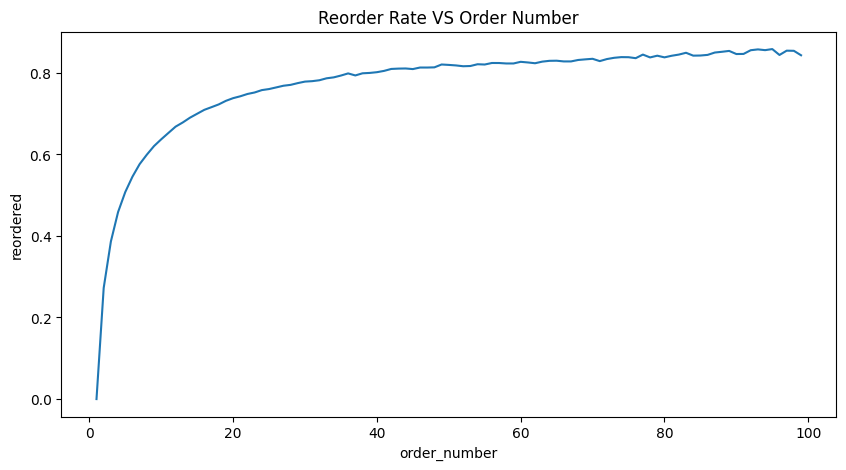

In [18]:
order_ordernum=complete_df.groupby('order_number')['reordered'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=order_ordernum,x='order_number',y='reordered')
plt.title("Reorder Rate VS Order Number")
plt.show()

Handle Numrical Features

In [26]:
num_cols=complete_df.select_dtypes(include=['int32','float32','int64','float64']).columns
num_cols

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'aisle_id',
       'department_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

Handle Categorical Features

In [27]:
cat_cols=complete_df.select_dtypes(include=['object']).columns
cat_cols

Index(['product_name', 'department', 'aisle', 'eval_set'], dtype='object')

Correlation For Numrical Featuers ("Heatmap")

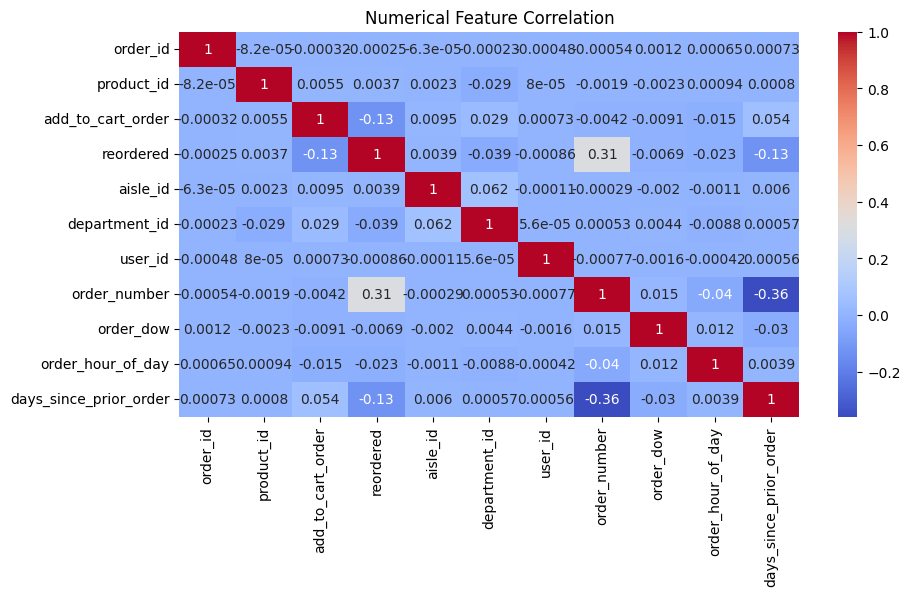

In [21]:
plt.figure(figsize=(10,5))
correlation_matrix=complete_df[num_cols].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Numerical Feature Correlation")
plt.show()

Correlation For Numrical Featuers ("pairwise scatter")

<Figure size 800x900 with 0 Axes>

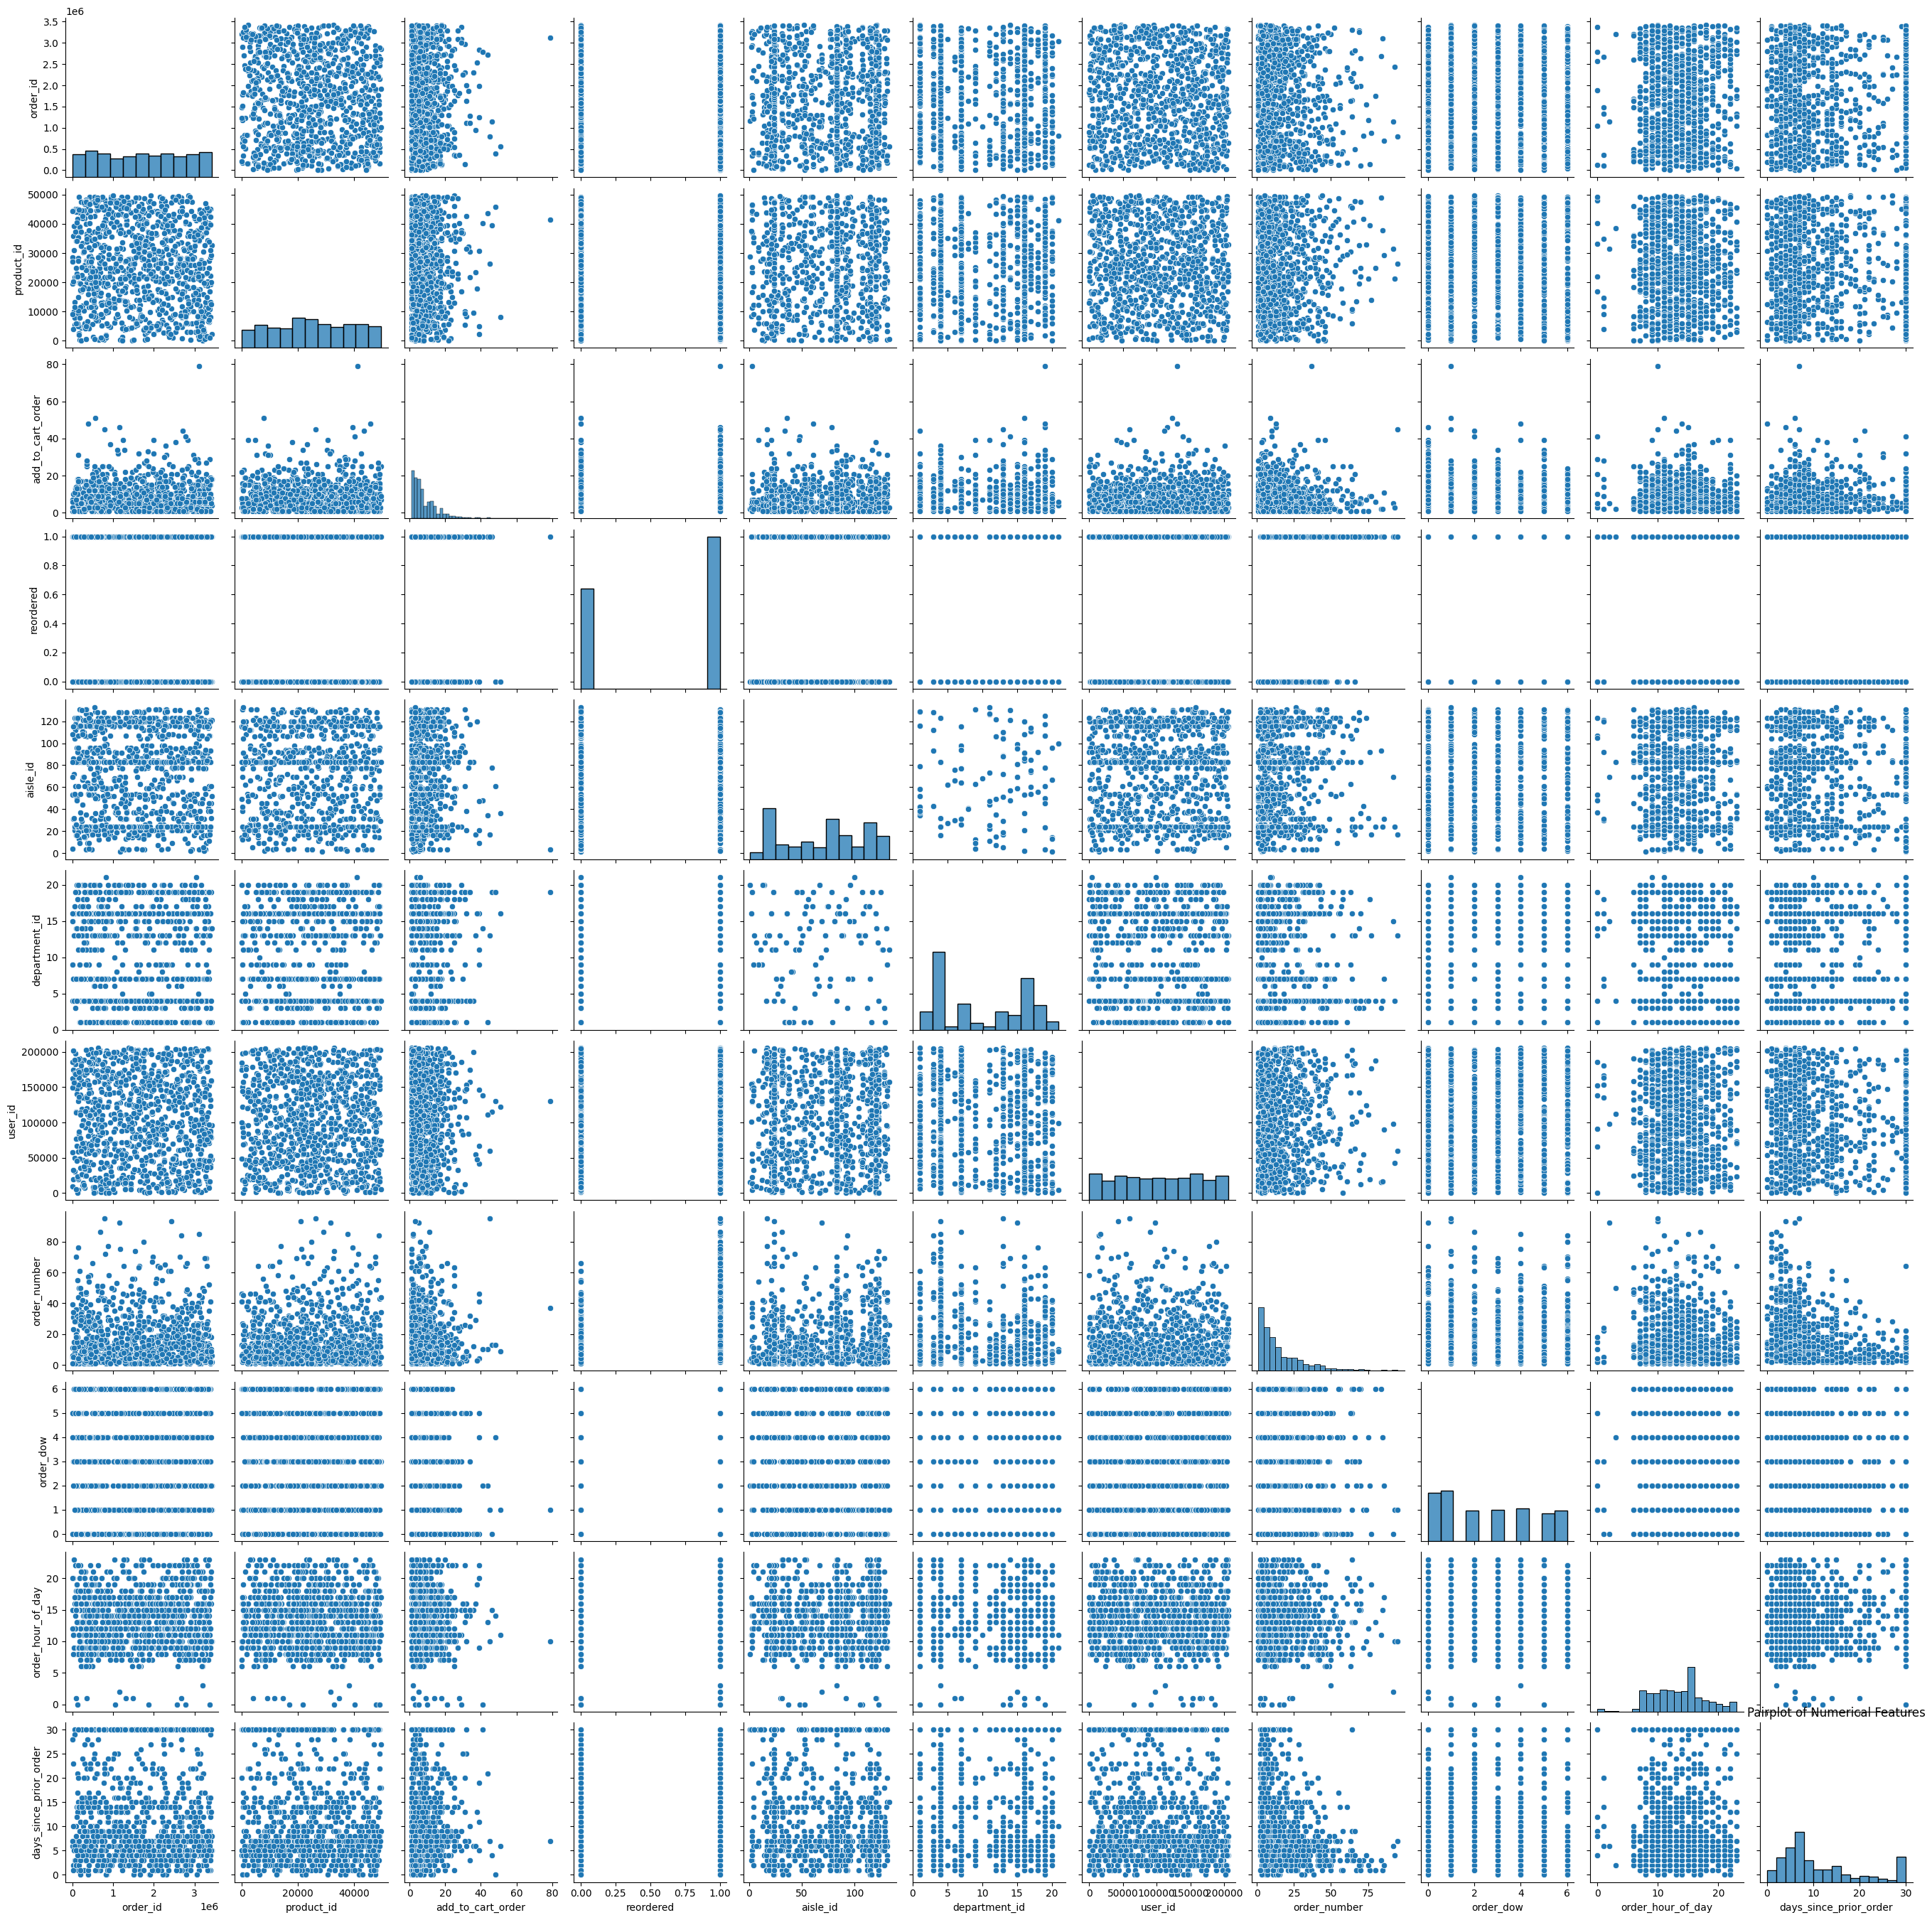

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,9))
sample_df=complete_df.sample(1000,random_state=42)
sns.pairplot(sample_df[num_cols])
plt.title("Pairplot of Numerical Features")
plt.show()

Time Of Day plot

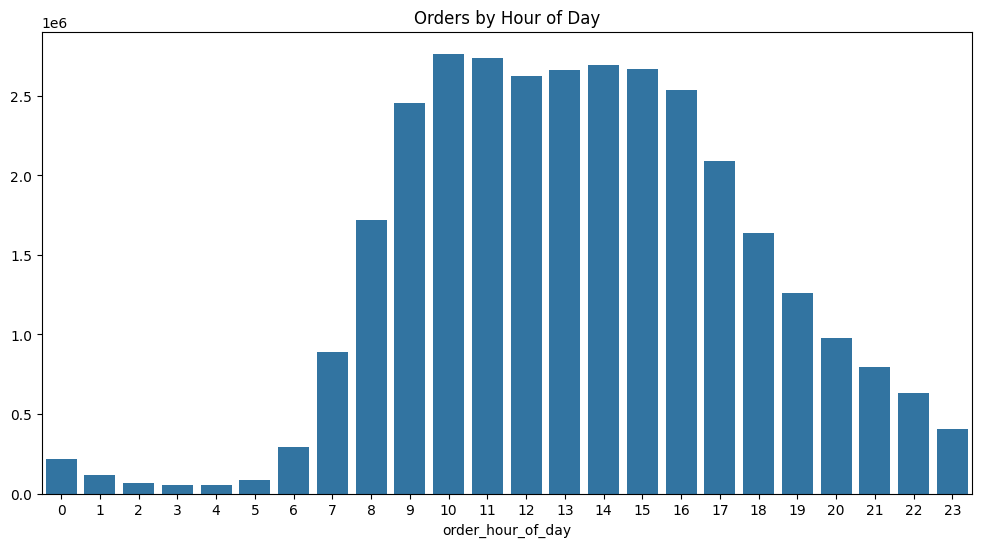

In [23]:
whole_day=complete_df['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=whole_day.index,y=whole_day.values)
plt.title("Orders by Hour of Day")
plt.show()


Orders in the Whole Week

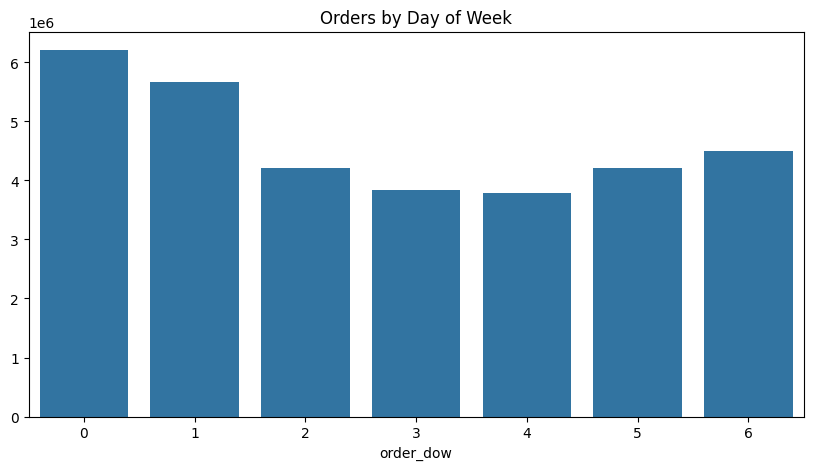

In [24]:
whole_week=complete_df['order_dow'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=whole_week.index,y=whole_week.values)
plt.title("Orders by Day of Week")
plt.show()

In [25]:
# --- IGNORE ---

HANDLE MISSING VALUE

In [26]:
missing_value= complete_df.isnull().sum()
missing_value

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
department                      0
aisle                           0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

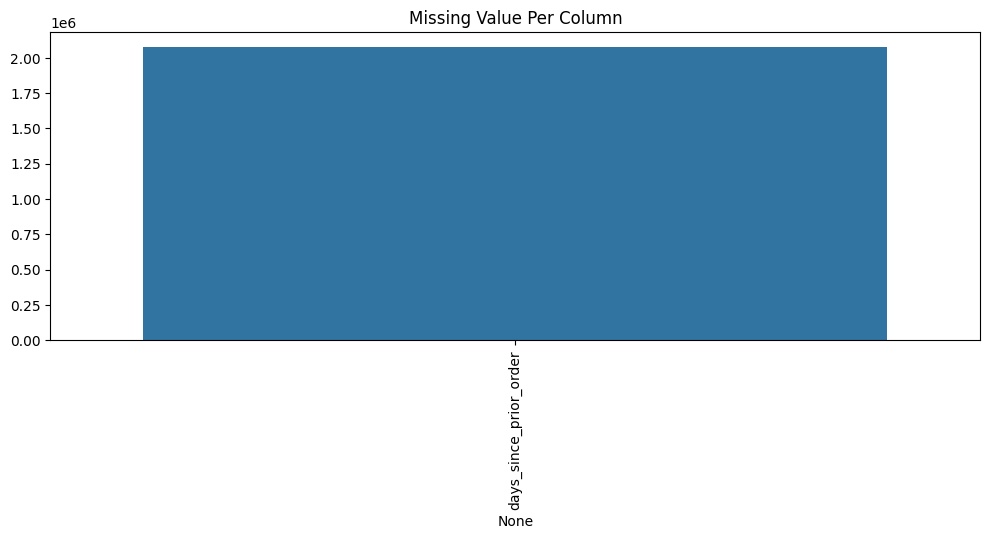

In [27]:
missing_count=complete_df.isnull().sum()
missing_count=missing_count[missing_count>0].sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x=missing_count.index,y=missing_count.values)
plt.xticks(rotation=90)
plt.title("Missing Value Per Column")
plt.show()

In [28]:
print ("..")

..


3. Cleaning & Imputation

Median Imputation

In [29]:
from sklearn.impute import SimpleImputer
median_df=complete_df.copy()
median_imputer=SimpleImputer(strategy='median')
median_df['days_since_prior_order']=median_imputer.fit_transform(median_df[['days_since_prior_order']])
median_df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

 Median Visualize

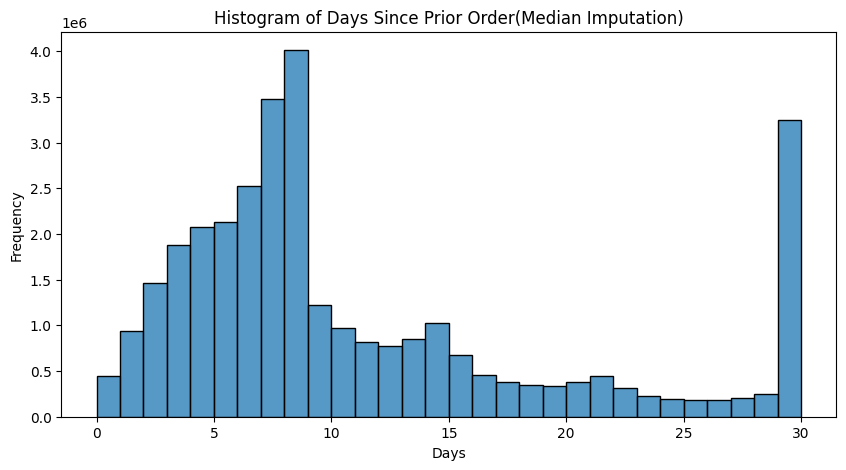

In [30]:
median_df.isnull().sum()
plt.figure(figsize=(10,5))
sns.histplot(median_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order(Median Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Most Frequent (Mode) Imputation

In [31]:
from sklearn.impute import SimpleImputer
freq_df=complete_df.copy()
freq_imputer = SimpleImputer(strategy='most_frequent')
freq_df['days_since_prior_order'] = freq_imputer.fit_transform(freq_df[['days_since_prior_order']])
freq_df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Most Frequent (Mode) Visualize

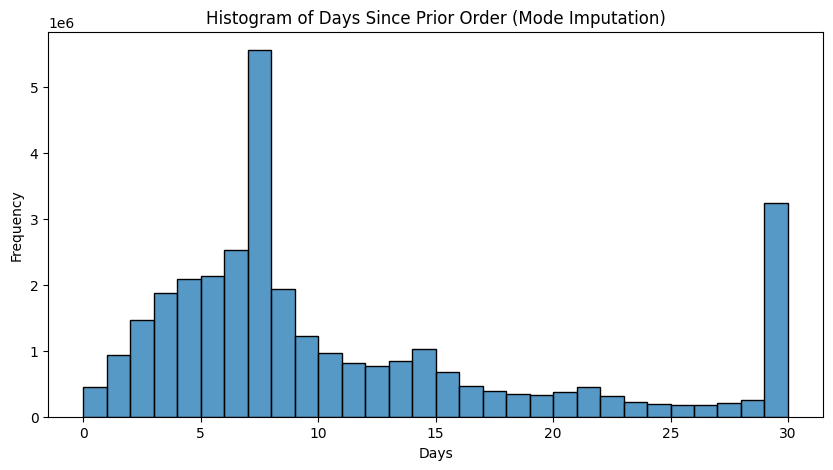

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(freq_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order (Mode Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Sentinel Imputation (الي رح نعتمده)

In [28]:
from sklearn.impute import SimpleImputer
sentinel_df=complete_df.copy()
sentinel_vl=0
sentinel_df['days_since_prior_order']=sentinel_df['days_since_prior_order'].fillna(sentinel_vl)
sentinel_df.isnull().sum()



order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Sentinel Visualize

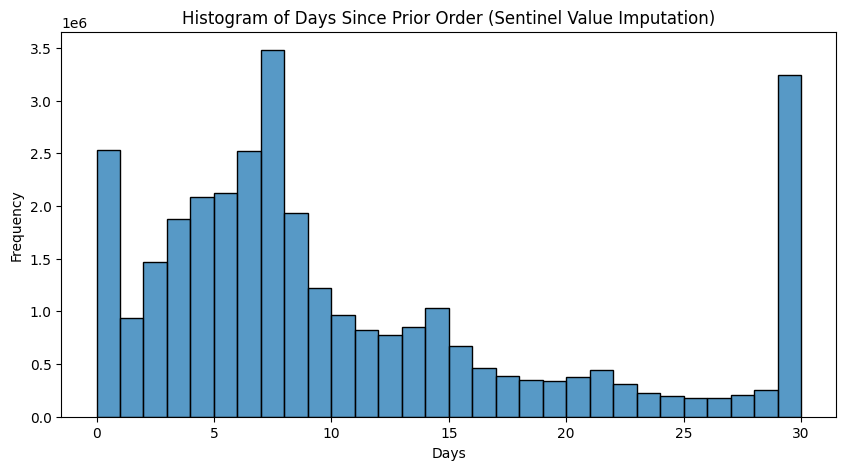

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(sentinel_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order (Sentinel Value Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Model-Based Imputation (KNN Imputer)

In [35]:
from sklearn.impute import KNNImputer
sample_knn = complete_df.sample(100000, random_state=42)
knn_imputer = KNNImputer(n_neighbors=5)
knn_sample_df = sample_knn.copy()
knn_sample_df[['days_since_prior_order']] = knn_imputer.fit_transform(knn_sample_df[['days_since_prior_order']])
knn_sample_df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Model Based Visualize

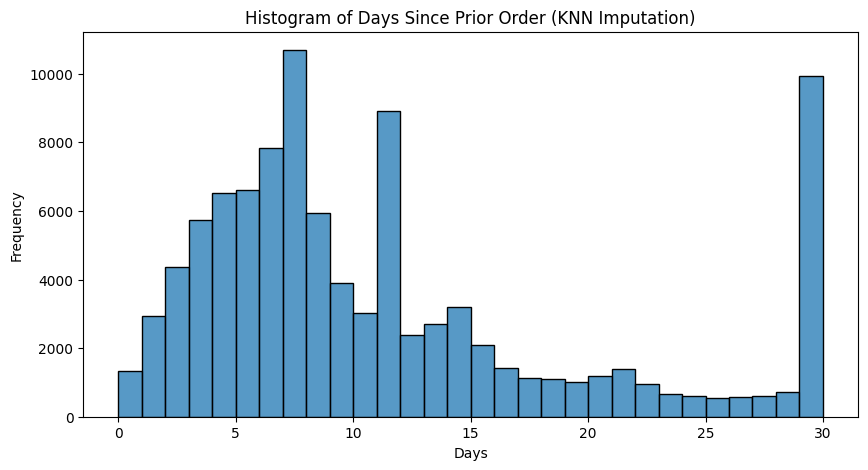

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(knn_sample_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order (KNN Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

In [29]:
complete_df['days_since_prior_order']=complete_df['days_since_prior_order'].fillna(sentinel_vl)

3-Outlier Detection & Treatment (Z-Score Method)

In [38]:
outlier_columns = []
for col in complete_df.select_dtypes(include=['int', 'float']):
    Q1 = complete_df[col].quantile(0.25)
    Q3 = complete_df[col].quantile(0.75)
    IQR = Q3 - Q1

    if ((complete_df[col] < (Q1 - 1.5 * IQR)) | (complete_df[col] > (Q3 + 1.5 * IQR))).any():
        outlier_columns.append(col)

print("Outlier columns:", outlier_columns)


Outlier columns: ['add_to_cart_order', 'order_number', 'order_hour_of_day', 'days_since_prior_order']


In [39]:
import numpy as np
outlier_columns=['add_to_cart_order','order_number']
mean_val =complete_df[outlier_columns].mean()
std_val  = complete_df[outlier_columns].std()
z_score = (complete_df[outlier_columns]- mean_val) / std_val
z_score


,add_to_cart_order,order_number
0,-1.031488,-0.806502
1,-0.891170,-0.806502
2,-0.750852,-0.806502
3,-0.610534,-0.806502
4,-0.470216,-0.806502
...,...,...
32434484,-0.329898,0.391100
32434485,-0.189580,0.391100
32434486,-0.049262,0.391100
32434487,0.091056,0.391100



Extracting Outliers

In [40]:
outlier_z = z_score[(z_score > 3) | (z_score < -3)]
print(outlier_z.shape)
len(outlier_z)

(32434489, 2)


32434489

Boxplot Before Removing Outliers (Z-score) Visualize

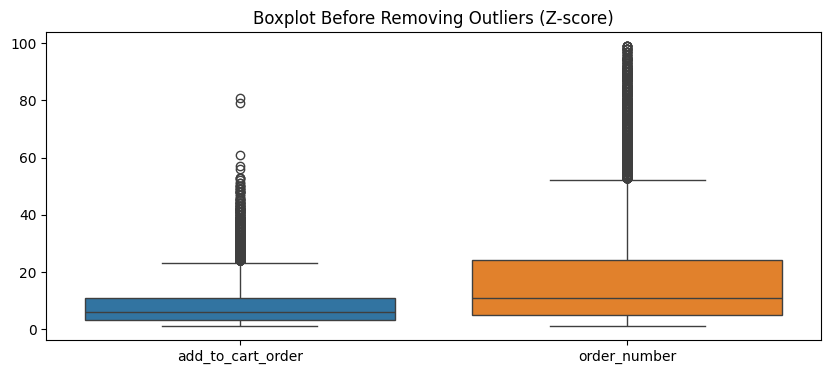

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sample_df=complete_df.sample(20000,random_state=42)
sns.boxplot(data=sample_df[outlier_columns])
plt.title("Boxplot Before Removing Outliers (Z-score)")
plt.show()


Histogram Before Removing Outliers (Z-score) Visualize

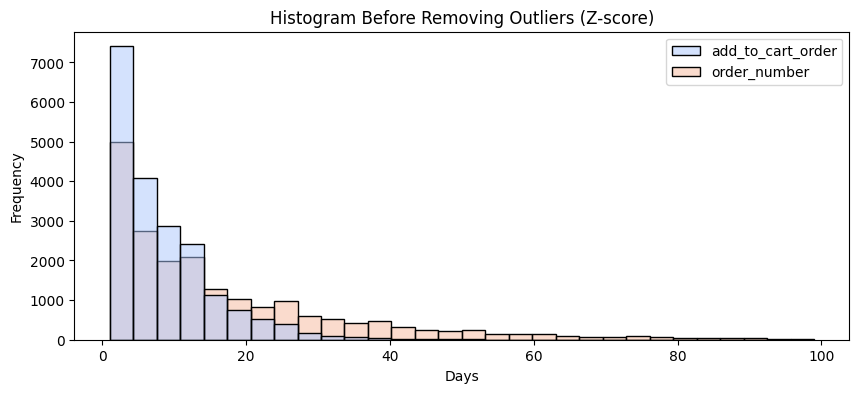

In [42]:
plt.figure(figsize=(10,4))
sns.histplot(data=sample_df[outlier_columns], bins=30, kde=False,palette="coolwarm")
plt.title("Histogram Before Removing Outliers (Z-score)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Removing Outliers

In [43]:
clean_z_df =sample_df[(z_score <= 3) & (z_score >= -3)]
clean_z_df.shape

(20000, 15)

Boxplot After Removing Outliers

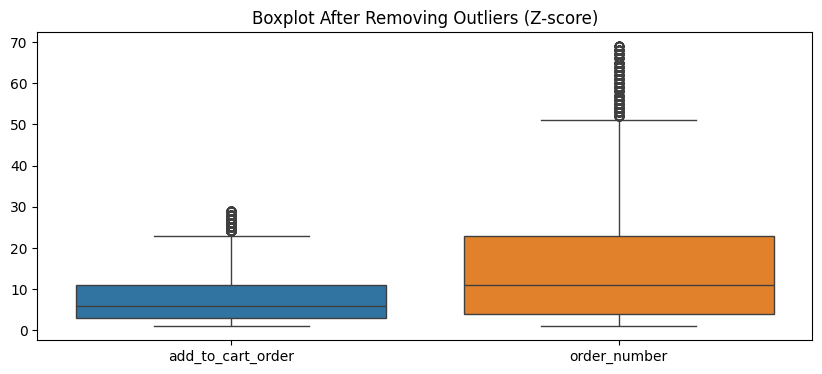

In [44]:
plt.figure(figsize=(10,4))
sns.boxplot(data=clean_z_df[outlier_columns])
plt.title("Boxplot After Removing Outliers (Z-score)")
plt.show()


Histogram After Removing Outliers

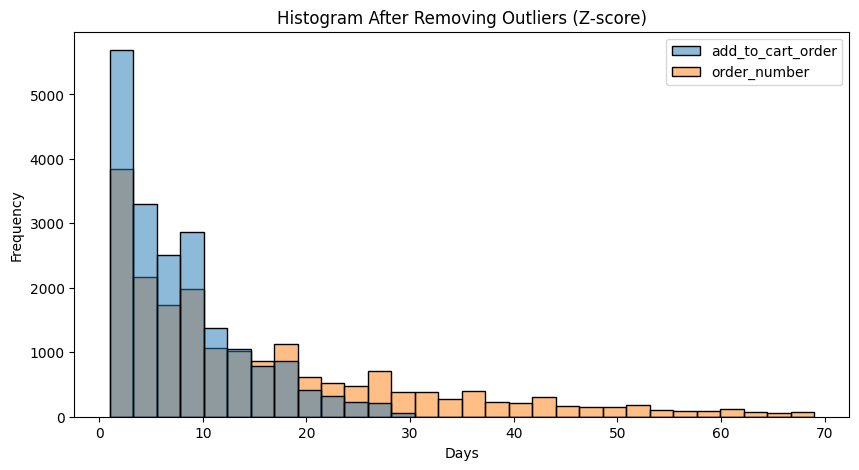

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(data=clean_z_df[outlier_columns], bins=30, kde=False)
plt.title("Histogram After Removing Outliers (Z-score)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

4-Encoding Categorical Variables

One-Hot Encoding (for low-cardinality categories)

In [46]:
low_card= ['department', 'aisle']
one_hot = pd.get_dummies(
   complete_df,
    columns=low_card,
    drop_first=True,
    sparse=True)

one_hot.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False


5. Feature Scaling

Feature Scaling("StandardScaler")

In [47]:
from sklearn.preprocessing import StandardScaler
standard_df=complete_df.copy()
scaler=StandardScaler()
standard_df[num_cols]=scaler.fit_transform(complete_df[num_cols])
standard_df.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,-1.732751,0.535137,-1.031488,0.834137,Organic Egg Whites,0.387029,0.967671,dairy eggs,eggs,1.670551,prior,-0.806502,1.08188,-1.042062,-0.268303
1,-1.732751,0.241806,-0.891170,0.834137,Michigan Organic Kale,0.308502,-0.942805,produce,fresh vegetables,1.670551,prior,-0.806502,1.08188,-1.042062,-0.268303
2,-1.732751,-1.152706,-0.750852,-1.198844,Garlic Powder,0.858196,0.490052,pantry,spices seasonings,1.670551,prior,-0.806502,1.08188,-1.042062,-0.268303
3,-1.732751,1.443010,-0.610534,0.834137,Coconut Butter,-1.366758,0.490052,pantry,oils vinegars,1.670551,prior,-0.806502,1.08188,-1.042062,-0.268303
4,-1.732751,0.316291,-0.470216,-1.198844,Natural Sweetener,-1.419110,0.490052,pantry,baking ingredients,1.670551,prior,-0.806502,1.08188,-1.042062,-0.268303


Feature Scaling("MinMaxScaler")

In [48]:
from sklearn.preprocessing import MinMaxScaler
min_max_df=complete_df.copy()
MMS=MinMaxScaler()
min_max_df[num_cols]=MMS.fit_transform(complete_df[num_cols])
min_max_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,0.0,0.666553,0.000000,1.0,Organic Egg Whites,0.639098,0.75,dairy eggs,eggs,0.980942,prior,0.020408,0.833333,0.391304,0.266667
1,0.0,0.583332,0.006944,1.0,Michigan Organic Kale,0.616541,0.15,produce,fresh vegetables,0.980942,prior,0.020408,0.833333,0.391304,0.266667
2,0.0,0.187695,0.013889,0.0,Garlic Powder,0.774436,0.60,pantry,spices seasonings,0.980942,prior,0.020408,0.833333,0.391304,0.266667
3,0.0,0.924125,0.020833,1.0,Coconut Butter,0.135338,0.60,pantry,oils vinegars,0.980942,prior,0.020408,0.833333,0.391304,0.266667
4,0.0,0.604464,0.027778,0.0,Natural Sweetener,0.120301,0.60,pantry,baking ingredients,0.980942,prior,0.020408,0.833333,0.391304,0.266667


6- Feature Enginnering

In [30]:
df = pd.DataFrame(complete_df , columns = complete_df.columns)
df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [ ]:
prior_df = df[df['eval_set'] == 'prior'].copy()
print(f"Prior set shape: {prior_df.shape}")

Prior set shape: (32434489, 15)


-User Level Features

In [33]:
user_features = prior_df.groupby('user_id').agg({
    'order_number': 'max',        # Total Orders
    'product_id': 'count',        # Total Items Bought
    'reordered': 'mean',          # Reorder Ratio
    'days_since_prior_order': ['mean','last'] # Avg Days Between & last order recency
}).reset_index()

user_features.columns = ['user_id', 'user_total_orders', 'user_total_items', 'user_reorder_ratio', 'user_avg_days_between','user_days_since_last_order']
user_features.head()

,user_id,user_total_orders,user_total_items,user_reorder_ratio,user_avg_days_between,user_days_since_last_order
0,1,10,59,0.694915,18.542374,19.0
1,2,14,195,0.476923,14.902564,30.0
2,3,12,88,0.625000,10.181818,7.0
3,4,5,18,0.055556,11.944445,0.0
4,5,4,37,0.378378,10.189189,0.0


In [ ]:
user_basket = prior_df.groupby(['user_id', 'order_number'])['product_id'].count().reset_index()
user_avg_basket = user_basket.groupby('user_id')['product_id'].mean().reset_index()
user_avg_basket.columns = ['user_id', 'user_avg_basket_size']

display(user_avg_basket.head())#كم منتج اليوزر بشتري  ب كل طلب 

,user_id,user_avg_basket_size
0,1,5.900000
1,2,13.928571
2,3,7.333333
3,4,3.600000
4,5,9.250000


- Product-level features

In [ ]:
product_features = prior_df.groupby('product_id').agg({
    'reordered': 'mean',          # Product Reorder Rate
    'add_to_cart_order': 'mean',  #متوسط موقع المنتج في السلة
    'user_id': 'count'            # Total Purchases (Popularity)
}).reset_index()

product_features.columns = ['product_id', 'product_reorder_rate', 'product_avg_position', 'product_total_purchases']
product_features.head()

,product_id,product_reorder_rate,product_avg_position,product_total_purchases
0,1,0.613391,5.801836,1852
1,2,0.133333,9.888889,90
2,3,0.732852,6.415162,277
3,4,0.446809,9.507599,329
4,5,0.600000,6.466667,15


User×Product interaction features

In [35]:
days_col = 'days_since_prior_order' if 'days_since_prior_order' in df.columns else 'user_days_since_last_order'

uxp_features = prior_df.groupby(['user_id', 'product_id']).agg(
    uxp_total_bought=('reordered', 'count'),#كم مره اليوزر اشترى هاد لمنتج 
    uxp_reorder_ratio=('reordered', 'mean'),
    uxp_last_order_num=('order_number', 'max') # رقم اخر طلب اشترى فيه المستخدم هاد المنتج 
).reset_index()

uxp_features = uxp_features.merge(user_features[['user_id', 'user_total_orders']], on='user_id', how='left')#عدد الطلبات لكلي لليوزر 

uxp_features['uxp_order_rate'] = uxp_features['uxp_total_bought'] / uxp_features['user_total_orders'] #معدل ظهور المنتج ضمن طلبات 

uxp_features['uxp_orders_since_last_bought'] = uxp_features['user_total_orders'] - uxp_features['uxp_last_order_num']# عدد الطلبات منذ اخر مره اشترى المنتج 

uxp_features = uxp_features[['user_id', 'product_id', 'uxp_total_bought', 'uxp_reorder_ratio', 'uxp_order_rate', 'uxp_orders_since_last_bought']]

display(uxp_features.head())

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,uxp_order_rate,uxp_orders_since_last_bought
0,1,196,10,0.900000,1.0,0
1,1,10258,9,0.888889,0.9,0
2,1,10326,1,0.000000,0.1,5
3,1,12427,10,0.900000,1.0,0
4,1,13032,3,0.666667,0.3,0


Temporal features

In [36]:
df['order_hour']=df['order_hour_of_day']#Hour

df['order_day']=df['order_dow']#Day

start_year=2024
days_per_year=365
df['order_year'] = start_year + df['days_since_prior_order']//days_per_year #Year
df['order_month'] = ((df['days_since_prior_order'] % days_per_year) // 30) + 1 #Month

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
df['order_season'] = df['order_month'].apply(get_season)#Season

df['is_weekend'] = df['order_dow'].apply(lambda x: 1 if x in [0, 1] else 0)#Holiday


In [37]:
# 1. Time Features (عادي نستخدم df لأنها row-wise)
df['is_weekend'] = df['order_dow'].apply(lambda x: 1 if x in [0, 1] else 0)

def time_of_day(hour):
    if 6 <= hour < 12: return 'Morning'
    elif 12 <= hour < 17: return 'Afternoon'
    elif 17 <= hour < 22: return 'Evening'
    else: return 'Night'

df['time_of_day'] = df['order_hour_of_day'].apply(time_of_day)

In [38]:
train_df = df.copy()


اخر 5 اوردرز عملتهم لانه صار عندي شوي اندرفيت فبدي اشي علاقات ييزيد الاكيورسي

User * Product -Recent Orders Feature 

In [ ]:
# بنرتب الطلبات وبناخذ آخر 5 لكل يوزر
prior_df['order_rank'] = prior_df.groupby('user_id')['order_number'].rank(method='first', ascending=False)

# بناخذ بس آخر 5 طلبات (Rank من 1 لـ 5)
recent_orders = prior_df[prior_df['order_rank'] <= 5]

recent_stats = recent_orders.groupby(['user_id', 'product_id']).agg({
    'reordered': 'count' # كم مرة *ظهر المنتج* في آخر 5 طلبات
}).reset_index()

recent_stats.columns = ['user_id', 'product_id', 'uxp_bought_last_5']

train_df = train_df.merge(recent_stats, on=['user_id', 'product_id'], how='left')

# 4. تنظيف NaNs (إذا ما ظهر ولا مرة بآخر 5 طلبات، بنحط 0)
train_df['uxp_bought_last_5'] = train_df['uxp_bought_last_5'].fillna(0)

# يعني: اشترى 3 مرات من أصل 5 طلبات = 0.60
train_df['uxp_recent_trend'] = train_df['uxp_bought_last_5'] / 5



User * Department Interaction برضو ضفته عشان يرفعلي الاكيورسي 

In [ ]:
# 1. بنحسب من داتا الماضي فقط (منعاً للتسريب)
# بنشوف علاقة اليوزر بكل قسم (Department)
prior_df = df[df['eval_set'] == 'prior'].copy()

user_dept_stats = prior_df.groupby(['user_id', 'department_id']).agg({
    'reordered': 'mean',  # نسبة إعادة الطلب لهذا اليوزر في هذا القسم
    'product_id': 'count' # عدد مرات الشراء من هذا القسم
}).reset_index()

user_dept_stats.columns = ['user_id', 'department_id', 'user_dept_reorder_ratio', 'user_dept_total_bought']

# 2. الدمج مع الداتا الأساسية
# انتبه: بنعمل Left Merge عشان نحافظ على الـ Train Set
train_df = train_df.merge(user_dept_stats, on=['user_id', 'department_id'], how='left')

# 3. تنظيف الـ NaNs
# إذا اليوزر أول مرة بشتري من هاد القسم، النسبة بتكون 0
train_df['user_dept_reorder_ratio'] = train_df['user_dept_reorder_ratio'].fillna(0)
train_df['user_dept_total_bought'] = train_df['user_dept_total_bought'].fillna(0)



Aggregations over windows (e.g., last 3 orders, last 6 months).

In [41]:
# 1. الخطوة الأهم: استخدام داتا الماضي فقط (prior) لمنع التسريب
# ممنوع الموديل يعرف حجم السلة الحالية قبل ما يتوقعها
prior_df_rolling = df[df['eval_set'] == 'prior'].copy()

# 2. تجميع البيانات لكل طلب (Order Level)
order_metrics = prior_df_rolling.groupby(['user_id', 'order_number']).agg({
    'product_id': 'count',            # حجم السلة
    'days_since_prior_order': 'max'   # الأيام الفاصلة
}).reset_index()

order_metrics.rename(columns={
    'product_id': 'basket_size',
    'days_since_prior_order': 'days_gap'
}, inplace=True)
order_metrics.head()

,user_id,order_number,basket_size,days_gap
0,1,1,5,0.0
1,1,2,6,15.0
2,1,3,5,21.0
3,1,4,5,29.0
4,1,5,8,28.0


In [ ]:

# 3. دالة الـ Rolling Mean
def get_recent_avg(x):
    return x.rolling(window=3, min_periods=1).mean()

order_metrics['avg_basket_last_3'] = order_metrics.groupby('user_id')['basket_size'].transform(get_recent_avg)#متوسط عدد المنتجات ب اخر 3 طلبات 
order_metrics['avg_days_gap_last_3'] = order_metrics.groupby('user_id')['days_gap'].transform(get_recent_avg)#متوسط عدد الايام بين اخرر 3 طلبات 

# 4. أخذ آخر حالة وصل لها المستخدم في الماضي (The snapshot before current order)**
user_rolling_features = order_metrics.groupby('user_id').last().reset_index()

# اختيار الأعمدة المطلوبة فقط
user_rolling_features = user_rolling_features[['user_id', 'avg_basket_last_3', 'avg_days_gap_last_3']]

cols_to_drop = ['avg_basket_last_3', 'avg_days_gap_last_3']
train_df = train_df.drop(columns=[c for c in cols_to_drop if c in train_df.columns], errors='ignore')

train_df = train_df.merge(user_rolling_features, on='user_id', how='left')

train_df['avg_basket_last_3'] = train_df['avg_basket_last_3'].fillna(train_df['avg_basket_last_3'].mean())
train_df['avg_days_gap_last_3'] = train_df['avg_days_gap_last_3'].fillna(train_df['avg_days_gap_last_3'].mean())

display(train_df[['user_id', 'avg_basket_last_3', 'avg_days_gap_last_3']].head())

,user_id,avg_basket_last_3,avg_days_gap_last_3
0,202279,13.333333,28.0
1,202279,13.333333,28.0
2,202279,13.333333,28.0
3,202279,13.333333,28.0
4,202279,13.333333,28.0


In [49]:
train_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'department', 'aisle',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'order_hour', 'order_day', 'order_year',
       'order_month', 'order_season', 'is_weekend', 'time_of_day',
       'avg_basket_last_3', 'avg_days_gap_last_3', 'uxp_bought_last_5',
       'uxp_recent_trend', 'user_dept_reorder_ratio',
       'user_dept_total_bought'],
      dtype='object')

In [51]:

# 1. User Stats
train_df = train_df.merge(user_features, on='user_id', how='left')
train_df = train_df.merge(user_avg_basket, on='user_id', how='left')

# 2. Product Stats
train_df = train_df.merge(product_features, on='product_id', how='left')

# 3. UXP Stats
train_df = train_df.merge(uxp_features, on=['user_id', 'product_id'], how='left')

train_df['uxp_total_bought'] = train_df['uxp_total_bought'].fillna(0)
train_df['uxp_reorder_ratio'] = train_df['uxp_reorder_ratio'].fillna(0)
train_df['uxp_order_rate'] = train_df['uxp_order_rate'].fillna(0)
train_df['uxp_orders_since_last_bought'] = train_df['uxp_orders_since_last_bought'].fillna(999) 



NameError: name 'user_avg_basket' is not defined

At least one engineered non-linear feature (log transforms, polynomial, interaction
terms).


In [50]:
train_df['log_days_gap'] = np.log1p(train_df['days_since_prior_order'])
train_df[['days_since_prior_order', 'log_days_gap']].head(10)

,days_since_prior_order,log_days_gap
0,8.0,2.197225
1,8.0,2.197225
2,8.0,2.197225
3,8.0,2.197225
4,8.0,2.197225
5,8.0,2.197225
6,8.0,2.197225
7,8.0,2.197225
8,8.0,2.197225
9,12.0,2.564949


Dimensionality & collinearity

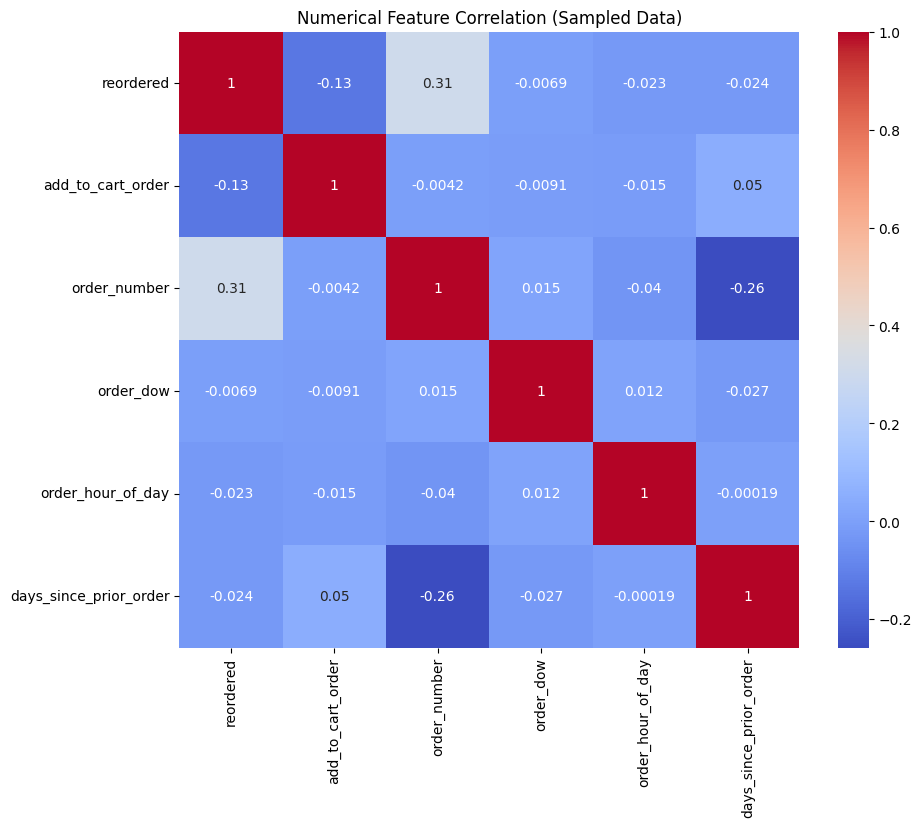

In [61]:
cols_for_corr = [
    'reordered', 
    'add_to_cart_order', 
    'order_number', 
    'order_dow', 
    'order_hour_of_day', 
    'days_since_prior_order'
]

sample_corr = complete_df[cols_for_corr].corr()
plt.figure(figsize=(10,8))
sns.heatmap(sample_corr, annot=True, cmap='coolwarm')
plt.title("Numerical Feature Correlation (Sampled Data)")
plt.show()

In [21]:
id_cols = ['order_id' , 'user_id' , 'product_id' , 'aisle_id' , 'department_id']
low_cols = ["department_id" , "order_dow" , "time_of_day"] 
high_cols = ["user_id" , "product_id" , "aisle_id"] 

train_df[high_cols] = train_df[high_cols].astype(str)
#عشان التارقيت ما بشتغل غير مع كاتيقوري
target_col = "reordered"
Frequency_col = "product_name"

#عدد الاعمده كبير جدا فقلت بعمل لوب + استثناءات عشان اريح راسي
num_cols = (train_df.drop(columns=[target_col]).select_dtypes(include=["int32" , "float32"]).columns.tolist())
num_cols = [c for c in num_cols if c not in id_cols]

VIF

In [23]:
reduce_memo(train_df)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,...,user_avg_basket_size,product_reorder_rate,product_avg_cart_position,product_total_purchases,uxp_total_bought,uxp_reorder_ratio,uxp_last_order_num,avg_basket_last_3,avg_days_gap_last_3,log_days_gap
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs,202279,...,11.250000,0.708454,6.816959,19400,5,0.800000,8,13.333333,28.000000,2.197225
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables,202279,...,11.250000,0.694465,7.501683,67449,5,0.800000,6,13.333333,28.000000,2.197225
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings,202279,...,11.250000,0.157962,9.943166,6299,1,0.000000,3,13.333333,28.000000,2.197225
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars,202279,...,11.250000,0.272849,8.444893,744,5,0.800000,7,13.333333,28.000000,2.197225
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients,202279,...,11.250000,0.507909,8.481546,569,3,0.666667,7,13.333333,28.000000,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,household,dish detergents,25247,...,9.259259,0.439135,9.012514,1758,3,0.666667,24,12.000000,6.333333,3.091043
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,snacks,crackers,25247,...,9.259259,0.690338,10.695290,7069,1,0.000000,24,12.000000,6.333333,3.091043
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen,frozen breakfast,25247,...,9.259259,0.645333,9.608381,2625,1,0.000000,24,12.000000,6.333333,3.091043
32434487,3421083,24852,9,1,Banana,24,4,produce,fresh fruits,25247,...,9.259259,0.843501,4.894129,472565,13,0.923077,25,12.000000,6.333333,3.091043


In [ ]:
num_cols

In [29]:
%pip install statsmodels
#بدي استخدم VIF , هاض عباره عن فنكشن رياضي ببين قديش في ارتباط وتكرار بين الاعمده نفسهم 
#الهدف منه اني اشوف شو في اعمده فيهم تشابه كبير وبقدمو نفس المعلومه تقريبا عشان احذف واحد منهم
#بدي استخدم VIF , هاض عباره عن فنكشن رياضي ببين قديش في ارتباط وتكرار بين الاعمده نفسهم 
#الهدف منه اني اشوف شو في اعمده فيهم تشابه كبير وبقدمو نفس المعلومه تقريبا عشان احذف واحد منهم
from statsmodels.stats.outliers_influence import variance_inflation_factor
SAMPLE_SIZE = 50000 
V = train_df[num_cols].sample(n=SAMPLE_SIZE , random_state =42)

vif = pd.DataFrame()
vif["feature"] = V[num_cols].columns
vif["VIF"] = [variance_inflation_factor(V.values , i) for i in range(V.shape[1])]

#تحت 5 ممتاز
#بين ال 6 وال 10 مقبول
#اكثر من هيك بدك تشوف شو و وين في ترابط غير مهم وتبلش تحذف
#ال inf حذف مباشره

vif.sort_values("VIF" , ascending = True)

Note: you may need to restart the kernel to use updated packages.


C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,add_to_cart_order,1.010276
11,user_days_since_last_order,1.389293
8,order_month,2.650653
1,order_number,2.669123
10,user_avg_days_between,2.899881
9,user_total_orders,5.700023
12,uxp_last_order_num,6.022371
13,log_days_gap,6.440592
4,days_since_prior_order,11.269023
7,order_year,81.653014


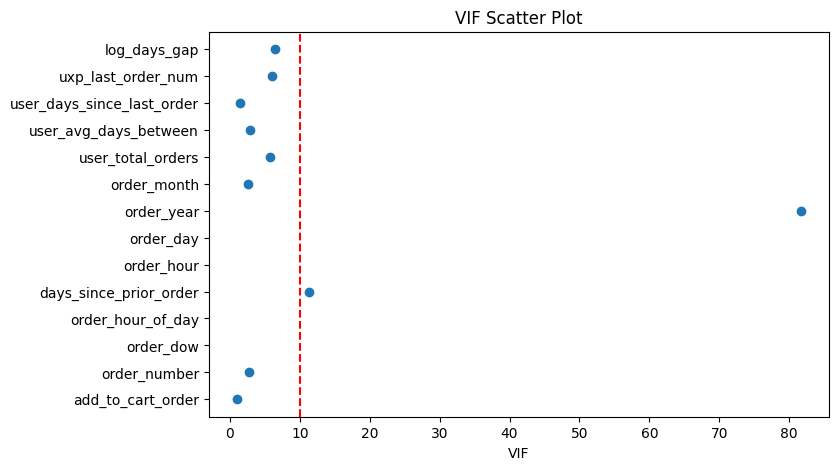

In [30]:
plt.figure(figsize = (8 , 5))
plt.scatter(vif["VIF"] , vif["feature"])
plt.axvline(10 , color = 'red' , linestyle = '--')
plt.xlabel("VIF")
plt.title("VIF Scatter Plot")
plt.show()


In [54]:
#حذفت القيم اللانهائيه , والقيم اللي فيها النسبه عاليه , لانهم بدلو على تكرار وتشابه المعلومات , يعني لو خليتهم كلهم زي كأني مكرر نفس العامود ما فرقت 
drop_cols = [
    
    "uxp_days_last_order_" ,
    "u_total_orders_log" ,
    "user_total_orders" ,

    "product_avg_cart_position" ,
    "product_reorder_rate" ,
    "user_reorder_ratio" 
    ]

train_df = train_df.drop(columns = drop_cols , errors="ignore")

#صار عندي ايرور بالبريبروسيسر لانه الداتا صار فيها عدم تطابق بعد الدروب ف بدي ارجع انسخ الاعمده كمان مره
num_cols = (train_df.drop(columns=[target_col]).select_dtypes(include=["int32" , "float32"]).columns.tolist())
num_cols = [c for c in num_cols if c not in id_cols]

Embalanced Data Handling

In [25]:
orders_train = pd.read_csv(r"D:\DATASET\order_products__train.csv")
orders_train = orders_train[['order_id', 'product_id', 'reordered']]

train_df['reordered_y']=orders_train['reordered']



In [26]:
train_df['reordered_y'].value_counts()
train_df['reordered_y'].isnull().sum()

np.int64(31049872)

In [27]:
train_df['reordered_y'].isnull().sum()
train_df['reordered_y'] = train_df['reordered_y'].fillna(0).astype(int)

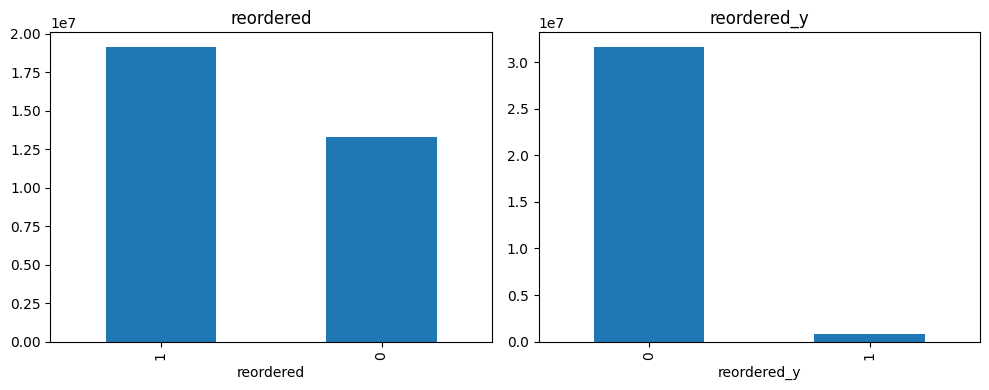

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_df['reordered'].value_counts().plot(
    kind='bar', ax=axes[0], title='reordered'
)

train_df['reordered_y'].value_counts().plot(
    kind='bar', ax=axes[1], title='reordered_y'
)

plt.tight_layout()
plt.show()


هيك بنكون بيننا انو اصلا في عنا imbalanced بالداتا

In [29]:
train_df=train_df.drop('reordered_y',axis=1)

In [110]:
train_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'department', 'aisle',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'uxp_total_bought_x', 'uxp_reorder_ratio_x',
       'uxp_days_last_order__x', 'order_hour', 'order_day', 'order_year',
       'order_month', 'order_season', 'is_weekend', 'time_of_day',
       'user_total_orders', 'user_total_items', 'user_reorder_ratio',
       'user_avg_days_between', 'user_days_since_last_order',
       'product_total_purchases', 'product_reorder_rate',
       'product_avg_cart_position', 'uxp_total_bought_y',
       'uxp_reorder_ratio_y', 'uxp_days_last_order__y', 'avg_basket_last_3',
       'avg_days_gap_last_3', 'log_days_gap'],
      dtype='object')

Modeling

In [28]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

low_cols = ["department_id", "order_dow", "time_of_day"] 
high_cols = ["user_id", "product_id", "aisle_id"]
Frequency_col = "product_name" # هذا اسم العمود، مش ليست

num_cols = [
    'order_hour_of_day', 
    'days_since_prior_order', 
    'is_weekend',
    'user_total_orders', 
    'user_avg_days_between',
    'product_reorder_rate', 
    'avg_basket_last_3', 
    'avg_days_gap_last_3',
    'product_avg_position',
    'product_total_purchases',
    'uxp_orders_since_last_bought',
    'user_total_items',              
    'uxp_orders_since_last_bought','user_dept_total_bought','user_dept_reorder_ratio'
    , 'uxp_bought_last_5', 'uxp_recent_trend'
    
    
    
    
    
]

final_input_cols = low_cols + high_cols + [Frequency_col] + num_cols

final_input_cols = [c for c in final_input_cols if c in train_df.columns]
final_input_cols = list(set(final_input_cols)) # إزالة التكرار

print(f"({len(final_input_cols)}): {final_input_cols}")

(23): ['product_name', 'avg_days_gap_last_3', 'uxp_orders_since_last_bought', 'product_reorder_rate', 'product_avg_position', 'user_total_items', 'time_of_day', 'product_total_purchases', 'avg_basket_last_3', 'user_dept_reorder_ratio', 'aisle_id', 'user_total_orders', 'user_id', 'product_id', 'department_id', 'order_dow', 'days_since_prior_order', 'uxp_bought_last_5', 'uxp_recent_trend', 'is_weekend', 'user_avg_days_between', 'user_dept_total_bought', 'order_hour_of_day']


In [29]:
train_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'department', 'aisle',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'order_hour', 'order_day', 'order_year',
       'order_month', 'order_season', 'is_weekend', 'time_of_day',
       'avg_basket_last_3', 'avg_days_gap_last_3', 'user_total_orders_x',
       'user_total_items_x', 'user_reorder_ratio_x', 'user_avg_days_between_x',
       'user_avg_basket_size_x', 'user_dept_reorder_ratio',
       'user_dept_total_bought', 'uxp_bought_last_5', 'uxp_recent_trend',
       'user_total_orders_y', 'user_total_items_y', 'user_reorder_ratio_y',
       'user_avg_days_between_y', 'user_avg_basket_size_y',
       'product_reorder_rate', 'product_avg_position',
       'product_total_purchases', 'uxp_total_bought', 'uxp_reorder_ratio',
       'uxp_order_rate', 'uxp_orders_since_last_bought', 'log_days_gap'],
      dty

In [29]:
# Ensure category_encoders is installed in the current kernel (try both PyPI names to be robust)


# import after installation
import category_encoders as ce

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Frequency_col is a single column name string — pass as a list to ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot",
         OneHotEncoder(handle_unknown="ignore", sparse_output=True, drop="first"),
         low_cols),

        ("target",
         ce.TargetEncoder(min_samples_leaf=20, smoothing=50),
         high_cols),

        ("freq",
         ce.CountEncoder(normalize=True),
         [Frequency_col]),

        ("scale",
         StandardScaler(),
         num_cols)
    ],
    remainder="drop"
)


In [30]:

from sklearn.model_selection import KFold
target_users_count = 10000 

unique_users = train_df['user_id'].unique()

if target_users_count > len(unique_users):
    target_users_count = len(unique_users)

np.random.seed(42)
my_users = np.random.choice(unique_users , size=target_users_count , replace=False)

final_sample = train_df[train_df['user_id'].isin(my_users)].copy()

final_sample = final_sample.sort_values(by=["user_id", "order_number"])
final_sample["last__orders"] = final_sample["order_number"] == final_sample.groupby("user_id")["order_number"].transform("max")

train_df_ = final_sample[final_sample['last__orders'] == False]
test_df_ = final_sample[final_sample['last__orders'] == True]

not_for_X_columns = ['reordered' , 'eval_set' , 'last__orders' ,  'order_id' , 'add_to_cart_order' , 'order_number',  'aisle' , 'department','time_of_day','uxp_last_order_num'] 

xc_train = train_df_.drop(columns=not_for_X_columns , errors='ignore')
yc_train = train_df_['reordered']

xc_test = test_df_.drop(columns = not_for_X_columns , errors = 'ignore')
yc_test = test_df_['reordered']

real_num_cols = [c for c in num_cols if c not in not_for_X_columns]
real_low_cols = [c for c in low_cols if c not in not_for_X_columns]
real_high_cols = [c for c in high_cols if c not in not_for_X_columns]

# مدامني قسمت الداتا حسب الزمن فهيك عالاغلب مش رح احتاجه
KF = KFold(n_splits = 5 , shuffle = True , random_state = 42)

preprocessor = ColumnTransformer(
    transformers=[
        ("encoding" , OneHotEncoder(handle_unknown = "ignore" , sparse_output = True , drop = "first") , real_low_cols) ,

        # Target Encoding يُستخدم مع الأعمدة الفئوية ذات عدد القيم الكبير.
        # يتم تحويل كل فئة إلى متوسط قيمة المتغير الهدف المرتبط بها.
        # لتجنب تسريب الهدف (Target Leakage)، يتم تطبيق الترميز داخل
        # الـ Cross-Validation بحيث يُحسب الترميز من بيانات التدريب فقط.
        # معاملات min_samples_leaf و smoothing تقلل تأثير الفئات النادرة
        # عبر تقريبها من المتوسط العام، مما يحد من الـ overfitting.
        ("target_encoding" , ce.TargetEncoder(min_samples_leaf = 20 , smoothing = 50) , real_high_cols) ,
        ("Frequency" , ce.CountEncoder(normalize = True) , Frequency_col) ,
        ("scaling" , StandardScaler() , real_num_cols)
                 ]
)

# normlize =True -> عشان يخليلي كل القيم بين 0 و 1

train_cls = preprocessor.fit_transform(xc_train , yc_train)
test_cls = preprocessor.transform(xc_test)

Tuning

In [104]:
np.random.seed(42)
tuning_x = xc_train.copy()
tuning_y = yc_train.copy()

from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=3)


In [46]:
xc_train.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'user_id',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'order_hour', 'order_day', 'order_year', 'order_month', 'order_season',
       'is_weekend', 'avg_basket_last_3', 'avg_days_gap_last_3',
       'user_total_orders', 'user_total_items', 'user_reorder_ratio',
       'user_avg_days_between', 'user_avg_basket_size', 'product_reorder_rate',
       'product_avg_position', 'product_total_purchases', 'uxp_total_bought',
       'uxp_reorder_ratio', 'uxp_order_rate', 'uxp_orders_since_last_bought'],
      dtype='object')

KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, GroupKFold

# 1. القائمة المختارة بعناية (Safe & Strong List)
knn_features = [
    'order_dow',
    'order_hour_of_day',
    'days_since_prior_order',
    'is_weekend',
    'order_month',
    'user_total_items',
    'user_avg_days_between',
    'user_days_since_last_order',
    'product_total_purchases',
    'uxp_total_bought',
    'avg_basket_last_3',
    'avg_days_gap_last_3','user_id'
]


# التأكد إن الأعمدة موجودة فعلاً (حماية إضافية)
knn_features = [c for c in knn_features if c in xc_train.columns]


# 2. أخذ عينة صغيرة (Sampling)
SAMPLE_USERS = 2000 
KNNsmall_users = np.random.choice(xc_train['user_id'].unique(), size=SAMPLE_USERS, replace=False)

# فلترة الداتا بناءً على العينة والقائمة المختارة
knn_x_small = xc_train[xc_train['user_id'].isin(KNNsmall_users)].copy()
knn_y_small = yc_train[xc_train['user_id'].isin(KNNsmall_users)]



# 3. إعداد الـ GridSearch
KNN_pipline = make_pipeline(
    preprocessor, 
    KNeighborsClassifier(n_jobs=-1)
)

KNNparam_grid = {
    "kneighborsclassifier__n_neighbors": [30, 60, 80],
    "kneighborsclassifier__weights": ['distance'],  # distance عادة أحسن بالداتا الكبيرة
    "kneighborsclassifier__metric": ['manhattan']
}

gkf = GroupKFold(n_splits=3)

KNN_grid_search = GridSearchCV(
    estimator=KNN_pipline,
    param_grid=KNNparam_grid,
    cv=gkf,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)



KNN_grid_search.fit(
    knn_x_small,
    knn_y_small,
    groups=knn_x_small['user_id']
)

print("Best Score:", KNN_grid_search.best_score_)
print("Best Parameters:", KNN_grid_search.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Score: 0.8211140503217799
Best Parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 80, 'kneighborsclassifier__weights': 'distance'}


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

best_w = KNN_grid_search.best_params_['kneighborsclassifier__weights']

finalKNN_pip = make_pipeline(
        preprocessor, 
        KNeighborsClassifier(n_neighbors=50, weights=best_w, n_jobs=-1, metric='manhattan')
)

finalKNN_pip.fit(xc_train, yc_train)

y_proba = finalKNN_pip.predict_proba(xc_test)[:, 1]

best_t = 0.5
best_f1 = 0

for t in np.arange(0.3, 0.95, 0.05): # عشان اكتشفت انه النموذج جبان شوي فاضطريت اعمل ال thereshold زي مهو موجود بالسلايدات chapter 3
    y_temp = (y_proba >= t).astype(int)
    score = f1_score(yc_test, y_temp)
    
    if score > best_f1:
        best_f1 = score
        best_t = t

print(f"Best Threshold: {best_t}") # عشان يطلعلي افضل عتبة

y_pred_KNN = (y_proba >= best_t).astype(int)

print(classification_report(yc_test, y_pred_KNN))
print('KNN Accuracy', accuracy_score(yc_test, y_pred_KNN))
'''With Best Parameters k=30 , metric=distance : 0.9433722102'''
''' With Tuning and change metric and wights : 0.8974819271262918 '''
'''When i increase k over 30 the accuracy increases'''
'''k=80 got accuracy of 0.9123456790123457 > k=30 '''

'''كل الي فوق كان عندي ليكج وحليتها '''

'''Best Threshold: 0.35
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     42675
           1       0.81      0.83      0.82     60380

    accuracy                           0.78    103055
   macro avg       0.78      0.78      0.78    103055
weighted avg       0.78      0.78      0.78    103055

KNN Accuracy 0.7848333414196303'''



Best Threshold: 0.35
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     42675
           1       0.81      0.83      0.82     60380

    accuracy                           0.78    103055
   macro avg       0.78      0.78      0.78    103055
weighted avg       0.78      0.78      0.78    103055

KNN Accuracy 0.7848333414196303


'k=80 got accuracy of 0.9123456790123457 > k=30 '

Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, GroupKFold

categorical_needs = low_cols + high_cols + [Frequency_col]

safe_numeric_cols = [
    'order_hour_of_day', 'days_since_prior_order', 'is_weekend',
    'user_total_orders', 'user_reorder_ratio', 'user_avg_days_between',
    'product_reorder_rate', 'uxp_total_bought', 
    'avg_basket_last_3', 'avg_days_gap_last_3'
]

final_features = list(set(categorical_needs + safe_numeric_cols))

blacklist = ['reordered', 'reordered_y', 'add_to_cart_order', 'eval_set']
final_features = [c for c in final_features if c not in blacklist]
final_features = [c for c in final_features if c in tuning_x.columns]

tuning_users = np.random.choice(tuning_x["user_id"].unique(), size=2500, replace=False)

LoR_x_small = tuning_x[tuning_x['user_id'].isin(tuning_users)][final_features].copy().sort_values(by=['user_id'])
LoR_y_small = tuning_y.loc[LoR_x_small.index]
groups_small = LoR_x_small['user_id']

LoR_pipline = make_pipeline(
    preprocessor, 
    LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
)

LoRparam_grid = {
    "logisticregression__C": [0.001, 0.01, 0.1, 1, 10],
    "logisticregression__penalty": ['l1', 'l2']
}

gkf = GroupKFold(n_splits=3)

LoR_grid_search = GridSearchCV(
    estimator=LoR_pipline,
    param_grid=LoRparam_grid,
    cv=gkf,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

LoR_grid_search.fit(
    LoR_x_small, 
    LoR_y_small, 
    groups=groups_small
)

print("\nBest Score:", LoR_grid_search.best_score_)
print("Best Parameters:", LoR_grid_search.best_params_)
'''Best Score: 0.791938732224401
Best Parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}'''

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(



Best Score: 0.791938732224401
Best Parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

best_C = LoR_grid_search.best_params_["logisticregression__C"]
best_P = LoR_grid_search.best_params_["logisticregression__penalty"]

# 1. تعريف وتدريب الموديل
final_LoR_pipeline = make_pipeline(
    preprocessor, 
    # شلت n_jobs=-1 لانه liblinear ما بيدعمه
    LogisticRegression(solver='liblinear', C=best_C, penalty=best_P, class_weight='balanced', random_state=42)
)

final_LoR_pipeline.fit(xc_train, yc_train)

# 2. حساب الاحتمالات (بدل التوقع المباشر)
y_proba = final_LoR_pipeline.predict_proba(xc_test)[:, 1]

# 3. البحث عن أفضل عتبة (Threshold)
thresholds = np.arange(0.3, 0.95, 0.05)
best_threshold = 0.5
best_f1 = 0

for t in thresholds:
    y_temp = (y_proba >= t).astype(int)
    current_f1 = f1_score(yc_test, y_temp)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

# 4. النتيجة النهائية بناءً على أفضل عتبة
print(f"--- Best Threshold Used: {best_threshold} ---")
y_pred_optimized = (y_proba >= best_threshold).astype(int)

print(classification_report(yc_test, y_pred_optimized))
print(f"Logistic Accuracy: {accuracy_score(yc_test, y_pred_optimized):.4f}")


'''--- Best Threshold Used: 0.3 --- Without any leakage'''


'''precision    recall  f1-score   support

           0       0.73      0.89      0.80     42675
           1       0.91      0.76      0.83     60380

    accuracy                           0.82    103055
   macro avg       0.82      0.83      0.81    103055
weighted avg       0.83      0.82      0.82    103055

Logistic Accuracy: 0.8151'''

C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


--- Best Threshold Used: 0.3 ---
              precision    recall  f1-score   support

           0       0.73      0.89      0.80     42675
           1       0.91      0.76      0.83     60380

    accuracy                           0.82    103055
   macro avg       0.82      0.83      0.81    103055
weighted avg       0.83      0.82      0.82    103055

Logistic Accuracy: 0.8151


In [ ]:
#عملته عشان اعرف شو اشيل كولمز لانه صار عندي ليكج الريكول 1 باغلب الموديلز

import pandas as pd
import numpy as np

feature_names = final_LoR_pipeline.named_steps['columntransformer'].get_feature_names_out()

coeffs = final_LoR_pipeline.named_steps['logisticregression'].coef_[0]

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeffs})
coeff_df['Abs_Coeff'] = coeff_df['Coefficient'].abs()
top_features = coeff_df.sort_values(by='Abs_Coeff', ascending=False).head(10)

print(top_features[['Feature', 'Coefficient']])

y_proba_check = final_LoR_pipeline.predict_proba(xc_test)[:, 1]
print("\n--- توزيع الاحتمالات (هل كلها 1؟) ---")
print(pd.Series(y_proba_check).describe())

--- 🚨 أخطر 10 أعمدة (المتهمين بالتسريب) ---
                            Feature  Coefficient
38       scaling__uxp_reorder_ratio     2.413655
31  scaling__days_since_prior_order     0.462296
35   scaling__user_avg_days_between    -0.250532
37        scaling__uxp_total_bought     0.168114
33       scaling__user_total_orders     0.040292
34      scaling__user_reorder_ratio     0.023163
39       scaling__avg_basket_last_3    -0.013445
36    scaling__product_reorder_rate     0.003171
40     scaling__avg_days_gap_last_3     0.002560
8        encoding__department_id_10     0.000000

--- توزيع الاحتمالات (هل كلها 1؟) ---
count    103055.000000
mean          0.374342
std           0.350308
min           0.004584
25%           0.018767
50%           0.303411
75%           0.733221
max           0.991487
dtype: float64


Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
RF_features = [
    'order_dow',
    'order_hour_of_day',
    'days_since_prior_order',
    'is_weekend',
    'order_month',
    'user_total_items',
    'user_avg_days_between',
    'product_total_purchases',
    'avg_basket_last_3',
    'avg_days_gap_last_3',
    'uxp_orders_since_last_bought','user_dept_reorder_ratio',
    'user_dept_total_bought', 'uxp_bought_last_5', 'uxp_recent_trend'

]



# التأكد إن الأعمدة موجودة فعلاً (حماية إضافية)
RF_features = [c for c in knn_features if c in xc_train.columns]

tuning_users = np.random.choice(tuning_x["user_id"].unique(), size=800, replace=False)
RF_x_small = tuning_x[tuning_x['user_id'].isin(tuning_users)].copy().sort_values(by=['user_id'])
RF_y_small = tuning_y.loc[RF_x_small.index]

RF_pipline = make_pipeline(
    preprocessor ,
    RandomForestClassifier(class_weight = "balanced" , random_state = 42 , n_jobs = -1)
)

RFparam_grid = {
    "randomforestclassifier__n_estimators": [100 , 150 , 200] , 
    "randomforestclassifier__max_depth": [5, 10 , 20] , 
    "randomforestclassifier__min_samples_split": [5 , 10 , 30,50,] ,
    "randomforestclassifier__min_samples_leaf": [10 , 20 , 30] ,
    "randomforestclassifier__class_weight": ['balanced' , 'balanced_subsample']
}

RF_grid_search = GridSearchCV(
    estimator = RF_pipline ,
    param_grid = RFparam_grid , 
    cv =gkf,
    scoring = "f1" ,
    n_jobs = -1
)

RF_grid_search.fit(RF_x_small , RF_y_small,groups=RF_x_small['user_id'])

print("\nBest Score:", RF_grid_search.best_score_)
print("Best Parameters:", RF_grid_search.best_params_)


Best Score: 0.8489607431928764
Best Parameters: {'randomforestclassifier__class_weight': 'balanced_subsample', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 10, 'randomforestclassifier__min_samples_split': 30, 'randomforestclassifier__n_estimators': 200}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# هون بنحدد الاعمدة اللي بدنا ندخلها عالموديل
# تأكد انهم موجودين عندك بالداتا فريم xc_train
rf_features = [
    'order_dow',
    'order_hour_of_day',
    'days_since_prior_order',
    'is_weekend',
    'order_month',
    'user_total_items',
    'user_avg_days_between',
    'product_total_purchases',
    'avg_basket_last_3',
    'avg_days_gap_last_3',
    'uxp_orders_since_last_bought','user_dept_reorder_ratio',
    'user_dept_total_bought', 'uxp_bought_last_5', 'uxp_recent_trend'
]

# بنفلتر عشان نضمن ما يصير مشاكل لو في عمود ناقص
features_to_use = [c for c in rf_features if c in xc_train.columns]
X_train_rf = xc_train[features_to_use]
X_test_rf = xc_test[features_to_use]

# بنحدد شو الاعمدة اللي بدها ترميز (Categorical) وشو اللي بدها سكيلينج (Numerical)
# غالبا بس order_dow هو اللي بده ترميز لانه ارقام ايام الاسبوع
cat_cols = ['order_dow'] if 'order_dow' in features_to_use else []
num_cols = [c for c in features_to_use if c not in cat_cols]

# تعريف البري بروسيسور الخاص بالراندوم فوريست
preprocessor_rf = ColumnTransformer(
    transformers=[
        # بنحول الارقام لفئات (OneHot) عشان الموديل يفهم الايام صح
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        # الارقام العادية بنعمللها سكيلينج عشان نوحد المقاييس
        ('num', StandardScaler(), num_cols)
    ],
    remainder='drop' # اي اشي مش بالقائمة بنكبه
)

# تعريف الموديل القوي
final_RF_pipeline = make_pipeline(
    preprocessor_rf,
    RandomForestClassifier(
        n_estimators=150,       # زدنا عدد الشجر لـ 400 عشان الدقة تكون اعلى واستقرار اكثر
        max_depth=12,         # شلنا السقف عن العمق عشان الشجرة تتعلم براحتها
        min_samples_split=10,    # قللنا الرقم عشان نسمح بتفاصيل ادق
        min_samples_leaf=7,     # بنسمح للورقة تكون صغيرة عشان يلقط الحالات النادرة
        max_features='sqrt',    # افضل خيار للداتا المعقدة
        class_weight='balanced_subsample', # هاي بتوزن كل شجرة لحالها، ادق من balanced العادية
        n_jobs=1,              # شغل كل انوية المعالج
        random_state=42
    )
)

final_RF_pipeline.fit(X_train_rf, yc_train)

# حساب الاحتمالات للتوقع
y_proba = final_RF_pipeline.predict_proba(X_test_rf)[:, 1]

# هون اللعبة الصح: تضبيط العتبة (Threshold)
# عشان نلاقي احسن توازن بين الدقة والريكول
best_t = 0.5
best_score = 0

# بنجرب عتبات من 0.2 لـ 0.8
for t in np.arange(0.2, 0.8, 0.05):
    y_temp = (y_proba >= t).astype(int)
    # استخدمنا f1_score لانه بوازن، بس لو بدك اكيورسي بس، حط accuracy_score
    score = f1_score(yc_test, y_temp)
    
    if score > best_score:
        best_score = score
        best_t = t

print(f"احسن عتبة لقيناها: {best_t}")

# النتيجة النهائية بناء على احسن عتبة
y_pred_RF = (y_proba >= best_t).astype(int)

print(classification_report(yc_test, y_pred_RF))
print(f"Random Forest Accuracy: {accuracy_score(yc_test, y_pred_RF):.4f}")

In [ ]:
##################### حاولت ادوررررررررررررررررررررررررررر عافضل موديل توازن ترا بقدر انه اوصل الاكيورسي ل فوق ال خمس وثمنين بالراحة بس انه مع ليكج فهيك افضل حل وانسب اشي شفته

In [ ]:
import pandas as pd

# 1. بنجيب الموديل وأسماء الأعمدة من البايبلاين
rf_model = final_RF_pipeline.named_steps['randomforestclassifier']
preprocessor_step = final_RF_pipeline.named_steps['columntransformer']

# بنحاول نجيب الأسماء (حسب اصدار sklearn عندك)
try:
    feature_names = preprocessor_step.get_feature_names_out()
except:
    # احتياط لو الاصدار قديم
    feature_names = [f"Feature_{i}" for i in range(rf_model.n_features_in_)]

# 2. بنرتبهم عشان نشوف مين "الزعيم"
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances.head(10))

--- 🚨 أخطر أعمدة (المتهمين بالتسريب) ---
                            Feature  Importance
39       scaling__uxp_reorder_ratio    0.653124
34      scaling__user_reorder_ratio    0.106079
31  scaling__days_since_prior_order    0.104223
33       scaling__user_total_orders    0.052681
36    scaling__product_reorder_rate    0.022878
29          Frequency__product_name    0.016282
35   scaling__user_avg_days_between    0.015446
11       encoding__department_id_13    0.009112
38     scaling__avg_days_gap_last_3    0.008641
28        target_encoding__aisle_id    0.002235


Support Vector Machine 

In [ ]:
best_svm = svm_random.best_estimator_

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_pred_svm = best_svm.predict(xc_test)
y_prob_svm = best_svm.predict_proba(xc_test)[:, 1]

accuracy_score(yc_test, y_pred_svm)
roc_auc_score(yc_test, y_prob_svm)
print(classification_report(yc_test, y_pred_svm))


Linear SVM


In [43]:
dt_features = [
    'order_dow',
    'order_hour_of_day',
    'days_since_prior_order',
    'is_weekend',
    'order_month',
    'user_total_items',
    'user_avg_days_between',
    'user_days_since_last_order',
    'product_total_purchases',
   # 'uxp_total_bought',
    'uxp_reorder_ratio',
    'avg_basket_last_3',
    'avg_days_gap_last_3'
]


In [ ]:


from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import make_pipeline
svm_users = np.random.choice(
    xc_train['user_id'].unique(),
    size=5000,
    replace=False
)

svm_x_small = xc_train[xc_train['user_id'].isin(svm_users)][dt_features].copy()
svm_y_small = yc_train[xc_train['user_id'].isin(svm_users)]

svm_sample_pipeline = make_pipeline(
    CalibratedClassifierCV(
        LinearSVC(
            C=10,
            max_iter=5000,
            class_weight="balanced",
            random_state=42,
            
        ),
        method="sigmoid"
    )
)
svm_sample_pipeline.fit(svm_x_small, svm_y_small)
print("SVM with Linear Kernel Accuracy:", accuracy_score(svm_y_small, svm_sample_pipeline.predict(svm_x_small)))
print(classification_report(svm_y_small, svm_sample_pipeline.predict(svm_x_small)))

'''SVM Score with Linear Kernel Accuracy: 0.809161776248863 -> with c= 1.0'''
'''SVM Score with Linear Kernel Accuracy: 0.7996820567076329 -> with c= 10'''
'''SVM Score with Linear Kernel Accuracy: 0.8020444783838858 -> with c= 0.1'''
'''SVM Score with Linear Kernel Accuracy: 0.7984317144654071 with c=100'''

'''The best Score C is 1.0 as it gives the highest accuracy of 0.8091'''
'''SVM with Linear Kernel Accuracy: 0.8422420218217954
              precision    recall  f1-score   support

           0       0.85      0.74      0.79    300383
           1       0.84      0.91      0.87    436220

    accuracy                           0.84    736603
   macro avg       0.84      0.83      0.83    736603
weighted avg       0.84      0.84      0.84    736603
'''


SVM with Linear Kernel Accuracy: 0.8422420218217954
              precision    recall  f1-score   support

           0       0.85      0.74      0.79    300383
           1       0.84      0.91      0.87    436220

    accuracy                           0.84    736603
   macro avg       0.84      0.83      0.83    736603
weighted avg       0.84      0.84      0.84    736603



'The best Score C is 1.0 as it gives the highest accuracy of 0.8091'

In [ ]:
##################### حاولت ادوررررررررررررررررررررررررررر عافضل موديل توازن ترا بقدر انه اوصل الاكيورسي ل فوق ال خمس وثمنين بالراحة بس انه مع ليكج فهيك افضل حل وانسب اشي شفته

Decision Tree

In [57]:
dt_features = [
    'order_dow',
    'order_hour_of_day',
    'days_since_prior_order',
    'is_weekend',
    'order_month',
    'user_total_items',
    'user_avg_days_between',
    'product_total_purchases',
    'avg_basket_last_3',
    'avg_days_gap_last_3',
    'uxp_orders_since_last_bought','user_dept_reorder_ratio',
    'user_dept_total_bought', 'uxp_bought_last_5', 'uxp_recent_trend'

]

X_train_dt = xc_train[dt_features]
X_test_dt = xc_test[dt_features]





In [87]:
xc_train.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'user_id',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'order_hour', 'order_day', 'order_year', 'order_month', 'order_season',
       'is_weekend', 'avg_basket_last_3', 'avg_days_gap_last_3',
       'user_total_orders', 'user_total_items', 'user_reorder_ratio',
       'user_avg_days_between', 'user_avg_basket_size', 'product_reorder_rate',
       'product_avg_position', 'product_total_purchases', 'uxp_total_bought',
       'uxp_reorder_ratio', 'uxp_order_rate', 'uxp_orders_since_last_bought',
       'user_dept_reorder_ratio', 'user_dept_total_bought'],
      dtype='object')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_DT = dt_model.predict(X_test_dt)

print(classification_report(yc_test, y_pred_DT))
print(f"Decision Tree Accuracy: {accuracy_score(yc_test, y_pred_DT):.4f}")


'''Decision Tree Accuracy: 0.8300 with max_depth=30, min_samples_leaf=10, min_samples_split=20'''
'''Decision Tree Accuracy: 0.8330 with max_depth=20, min_samples_leaf=10, min_samples_split=10'''
'''Decision Tree Accuracy: 0.8331 with max_depth=50, min_samples_leaf=20, min_samples_split=10'''
'''Decision Tree Accuracy: 0.8172 with max_depth=5, min_samples_leaf=5, min_samples_split=5  '''


              precision    recall  f1-score   support

           0       0.69      1.00      0.82     42675
           1       1.00      0.69      0.82     60380

    accuracy                           0.82    103055
   macro avg       0.85      0.84      0.82    103055
weighted avg       0.87      0.82      0.82    103055

Decision Tree Accuracy: 0.8172


'Decision Tree Accuracy: 0.8172 with max_depth=5, min_samples_leaf=5, min_samples_split=5  '

In [ ]:
##################### حاولت ادوررررررررررررررررررررررررررر عافضل موديل توازن ترا بقدر انه اوصل الاكيورسي ل فوق ال خمس وثمنين بالراحة بس انه مع ليكج فهيك افضل حل وانسب اشي شفته

In [60]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score

# 1. تعديل الأوزان (دفعة قوية للكلاس 0)
# بما إنه الكلاس 0 كان مظلوم (0.83)، زدنا وزنه لـ 1.7 مقابل 1.0 للصفر
# هذا رح يجبر الموديل يركز على الـ 0 غصب عنه
custom_weights = {0: 1, 1: 0.5} 
cols_to_use = [c for c in dt_features if c in xc_train.columns]

# 2. Preprocessor جديد على قد القائمة
dt_cat_cols = ['order_dow']
dt_num_cols = [c for c in cols_to_use if c not in dt_cat_cols]

preprocessor_dt = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), dt_cat_cols),
        ('num', StandardScaler(), dt_num_cols)
    ],
    remainder='drop'
)
final_DT_pipeline = make_pipeline(
    preprocessor_dt, 
    DecisionTreeClassifier(
        max_depth=17,            # ⬇️ قللنا العمق عشان نضمن التعميم
        min_samples_leaf=100,   # ⬆️ زدنا الرقم عشان نمنع الحفظ الحرفي
        min_samples_split=60,
        class_weight=custom_weights,
        random_state=42
    )
)

final_DT_pipeline.fit(xc_train, yc_train)

# 2. البحث عن نقطة التوازن (Equal Recall Point)
y_proba = final_DT_pipeline.predict_proba(xc_test)[:, 1]

best_t = 0.5
min_gap = 1.0 # متغير عشان نخزن فيه أقل فرق لقيناه

print(f"{'Threshold':<10} {'Recall 0':<10} {'Recall 1':<10} {'Gap':<10}")
print("-" * 45)

for t in np.arange(0.01, 0.9, 0.05):
    preds = (y_proba >= t).astype(int)
    
    # حساب الريكول لكل طرف
    rec_0 = recall_score(yc_test, preds, pos_label=0)
    rec_1 = recall_score(yc_test, preds, pos_label=1)
    
    # الفرق بينهم
    gap = abs(rec_0 - rec_1)
    
    print(f"{t:.2f}      {rec_0:.2f}      {rec_1:.2f}      {gap:.2f}")
    
    #  نلاقي أصغر فجوة بينهم
    if gap < min_gap:
        min_gap = gap
        best_t = t

print(f"احسن عتبة مستقرة وبعيدة عن الليكج: {best_t}")

y_pred_balanced = (y_proba >= best_t).astype(int)

print(classification_report(yc_test, y_pred_balanced))
print(f"Balanced Accuracy: {accuracy_score(yc_test, y_pred_balanced):.4f}")

Threshold  Recall 0   Recall 1   Gap       
---------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.74      0.71     42675
           1       0.80      0.75      0.78     60380

    accuracy                           0.75    103055
   macro avg       0.74      0.75      0.74    103055
weighted avg       0.75      0.75      0.75    103055

Balanced Accuracy: 0.7461


C:\Users\owndi\AppData\Local\Temp\ipykernel_40664\466166928.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='coolwarm')


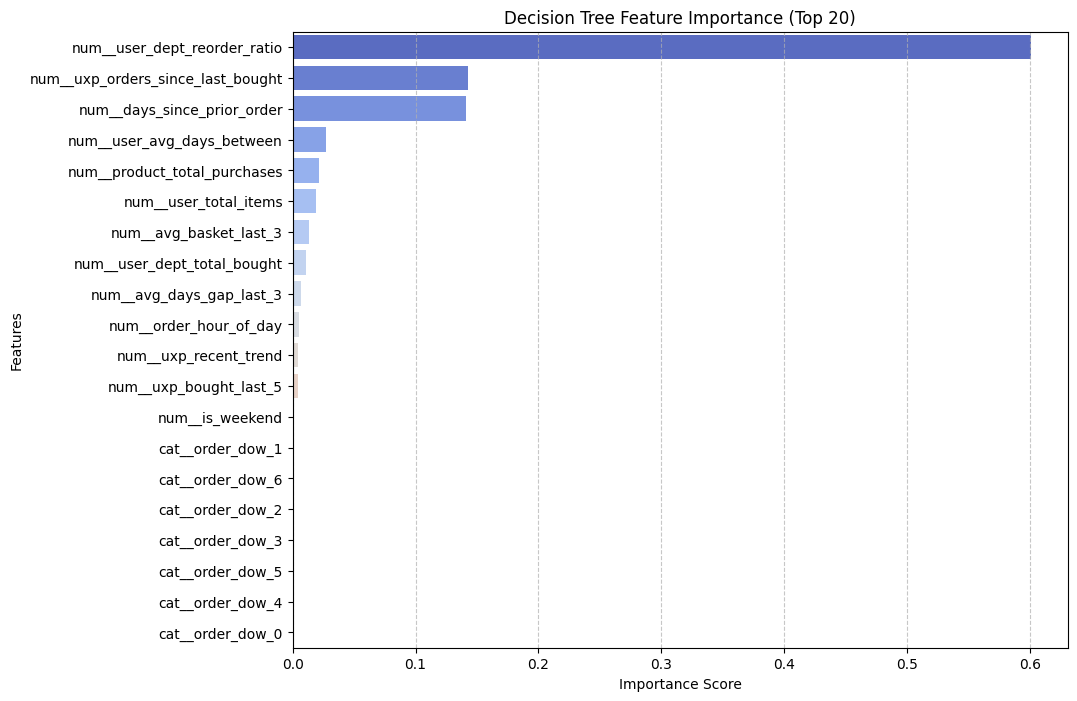

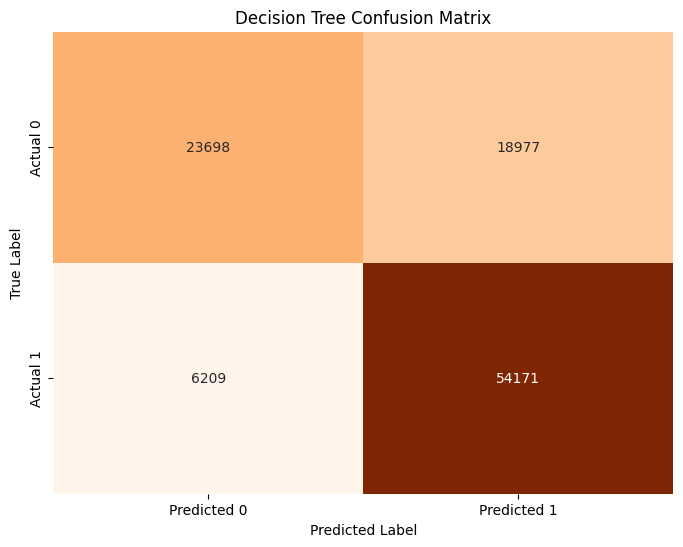

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# بنسحب الموديل والبري-بروسيسور من البايبلاين
dt_model = final_DT_pipeline.named_steps['decisiontreeclassifier']
dt_preprocessor = final_DT_pipeline.named_steps['columntransformer']

# بنجيب أهمية الفيتشرز
importances = dt_model.feature_importances_

# 💡 الحركة الذكية: بنجيب أسماء الأعمدة بعد التحويل (عشان الـ OneHotEncoder)
try:
    feature_names = dt_preprocessor.get_feature_names_out()
except AttributeError:
    # احتياط لو النسخة قديمة
    feature_names = [f"Feature_{i}" for i in range(len(importances))]

# -------------------------------------------------------
# 2. رسمة أهمية الفيتشرز (Feature Importance Plot)
# -------------------------------------------------------
plt.figure(figsize=(10, 8))

# ترتيبهم بـ DataFrame
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# بنرتب وبناخذ أعلى 20 فيتشر عشان الرسمة تكون واضحة
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(20)

# الرسم
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='coolwarm')

plt.title('Decision Tree Feature Importance (Top 20)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# -------------------------------------------------------
# 3. الكونفيوجن ماتريكس (Confusion Matrix)
# -------------------------------------------------------
plt.figure(figsize=(8, 6))

# تأكد إنك حاسب y_pred_final للـ Decision Tree قبل هاي الخطوة
# y_pred_final = final_DT_pipeline.predict(xc_test) <--- اذا مش حاسبه شغله

cm = confusion_matrix(yc_test, y_pred_final)

# الرسم
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
##################### حاولت ادوررررررررررررررررررررررررررر عافضل موديل توازن ترا بقدر انه اوصل الاكيورسي ل فوق ال خمس وثمنين بالراحة بس انه مع ليكج فهيك افضل حل وانسب اشي شفته

XGBOOST

In [64]:
xc_train.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'user_id',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'order_hour', 'order_day', 'order_year', 'order_month', 'order_season',
       'is_weekend', 'uxp_bought_last_5', 'uxp_recent_trend',
       'user_dept_reorder_ratio', 'user_dept_total_bought',
       'avg_basket_last_3', 'avg_days_gap_last_3', 'user_total_orders',
       'user_total_items', 'user_reorder_ratio', 'user_avg_days_between',
       'user_avg_basket_size', 'product_reorder_rate', 'product_avg_position',
       'product_total_purchases', 'uxp_total_bought', 'uxp_reorder_ratio',
       'uxp_order_rate', 'uxp_orders_since_last_bought', 'log_days_gap'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score

gb_features_final = [
  'order_dow',
    'order_hour_of_day',
    'days_since_prior_order',
    'is_weekend',
    'order_month',
    'user_total_items',
    'user_avg_days_between',
    'product_total_purchases',
    'avg_basket_last_3',
    'avg_days_gap_last_3',
    'uxp_orders_since_last_bought','user_dept_reorder_ratio',
    'user_dept_total_bought', 'uxp_bought_last_5', 'uxp_recent_trend',
    'product_reorder_rate','user_avg_basket_size','user_total_orders',
    'product_avg_position'

    
]

# التأكد انه الاعمدة موجودة عشان ما يضرب ايرور
features_to_use = [c for c in gb_features_final if c in xc_train.columns]

sample_size = 50000 
gb_users = np.random.choice(xc_train['user_id'].unique(), size=sample_size)

X_gb_sample = xc_train[xc_train['user_id'].isin(gb_users)][features_to_use]
y_gb_sample = yc_train[xc_train['user_id'].isin(gb_users)]

X_gb_test = xc_test[features_to_use]



xgb_model = XGBClassifier(
    n_estimators=1000,        
    max_depth=None,               
    learning_rate=0.1,        
    subsample=0.8,             # باخذ 80% من الداتا كل مرة عشان التنوع
    colsample_bytree=0.8,      # باخذ 80% من الاعمدة عشان يكتشف علاقات جديدة
    min_child_weight=10,       # بمنع الاوراق الضعيفة
    objective='binary:logistic',
    eval_metric='logloss',
    n_jobs=1,                 # شغل كل المعالج
    random_state=0,
    tree_method='hist'         # تسريع التدريب
)

xgb_model.fit(X_gb_sample, y_gb_sample)

y_proba = xgb_model.predict_proba(X_gb_test)[:, 1]

best_t = 0.5
best_f1 = 0


for t in np.arange(0.2, 0.9, 0.01):
    preds = (y_proba >= t).astype(int)
    f1 = f1_score(yc_test, preds)
    rec_0 = recall_score(yc_test, preds, pos_label=0)
    rec_1 = recall_score(yc_test, preds, pos_label=1)
    
    print(f"{t:.2f}      {f1:.4f}      {rec_0:.2f}      {rec_1:.2f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print(f"افضل عتبة (بناء على F1): {best_t}")

# النتيجة النهائية
y_pred_final = (y_proba >= best_t).astype(int)

print("\nتقرير الموديل النهائي:")
print(classification_report(yc_test, y_pred_final))
print(f"الدقة العامة (Accuracy): {accuracy_score(yc_test, y_pred_final):.4f}")



'''macro avg       0.80      0.73      0.74    103055
weighted avg       0.79      0.77      0.75    103055

الدقة العامة (Accuracy): 0.77851  بس ضفت كم فيتشر وشلت اكثر اثنين امبورتانس لانه حسيت فيهم ليكج وطلع معي هيك منطقي''' 



'''Balanced Threshold: 0.1000
              precision    recall  f1-score   support

           0       0.70      0.96      0.82     42675
           1       0.95      0.75      0.82     60380

    accuracy                           0.82    103055
   macro avg       0.85      0.85      0.82    103055
weighted avg       0.87      0.82      0.82    103055

XGBoost Accuracy: 0.8188    بس رجعت الفيتشرز الي الهم امبورتانس عالي ''' 

0.20      0.8102      0.53      0.91
0.21      0.8106      0.53      0.91
0.22      0.8107      0.54      0.90
0.23      0.8110      0.54      0.90
0.24      0.8113      0.55      0.90
0.25      0.8114      0.56      0.90
0.26      0.8113      0.56      0.89
0.27      0.8114      0.57      0.89
0.28      0.8113      0.57      0.89
0.29      0.8112      0.58      0.89
0.30      0.8110      0.59      0.88
0.31      0.8108      0.59      0.88
0.32      0.8104      0.60      0.87
0.33      0.8097      0.60      0.87
0.34      0.8092      0.61      0.87
0.35      0.8090      0.62      0.86
0.36      0.8085      0.63      0.86
0.37      0.8079      0.63      0.85
0.38      0.8072      0.64      0.85
0.39      0.8067      0.65      0.84
0.40      0.8056      0.65      0.84
0.41      0.8044      0.66      0.83
0.42      0.8035      0.67      0.83
0.43      0.8023      0.68      0.82
0.44      0.8011      0.68      0.82
0.45      0.7999      0.69      0.81
0.46      0.7978      0.70      0.81
0

'macro avg       0.80      0.73      0.74    103055\nweighted avg       0.79      0.77      0.75    103055\n\nالدقة العامة (Accuracy): 0.77851  بس ضفت كم فيتشر وشلت اكثر اثنين امبورتانس لانه حسيت فيهم ليكج وطلع معي هيك منطقي'

Balanced Threshold: 0.1000
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     42675
           1       1.00      0.69      0.82     60380

    accuracy                           0.82    103055
   macro avg       0.85      0.85      0.82    103055
weighted avg       0.87      0.82      0.82    103055

XGBoost Accuracy: 0.8193

C:\Users\owndi\AppData\Local\Temp\ipykernel_40664\2407200208.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


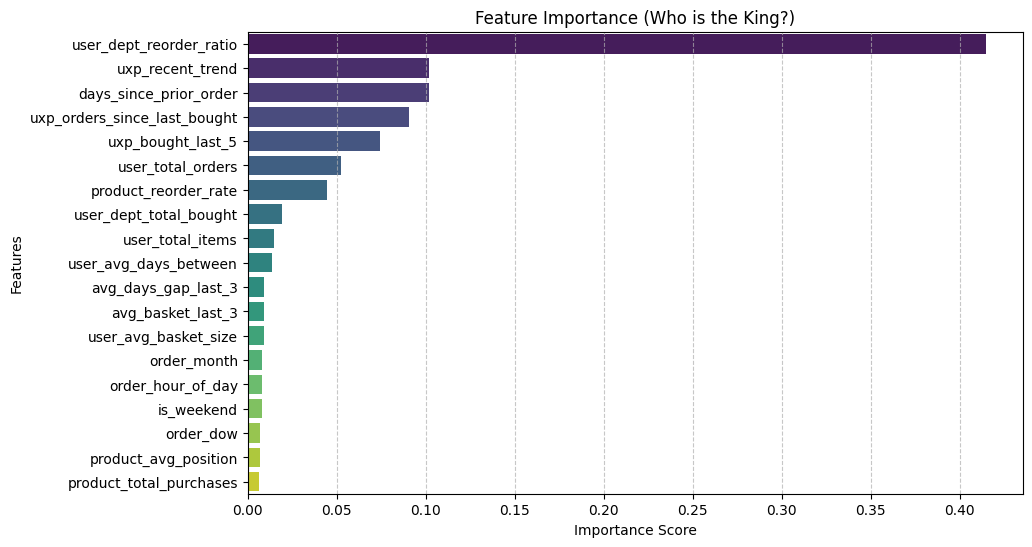

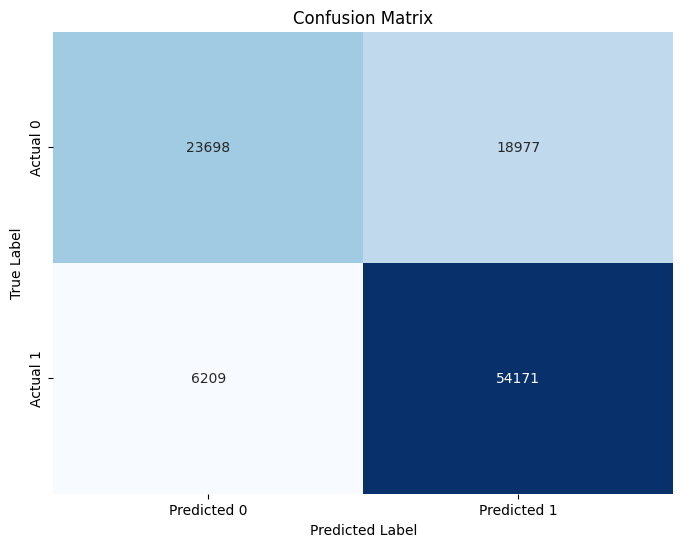

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# -------------------------------------------------------
# 1. رسمة أهمية الفيتشرز (Feature Importance Plot)
# -------------------------------------------------------
plt.figure(figsize=(10, 6))

# استخراج الأهمية وربطها بأسماء الأعمدة
importances = xgb_model.feature_importances_
feature_names = features_to_use

# عمل DataFrame عشان الترتيب
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# الرسم (Bar Chart)
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')

plt.title('Feature Importance (Who is the King?)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# -------------------------------------------------------
# 2. الكونفيوجن ماتريكس (Confusion Matrix)
# -------------------------------------------------------
plt.figure(figsize=(8, 6))

# حساب الماتريكس
cm = confusion_matrix(yc_test, y_pred_final)

# الرسم (Heatmap)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
##################### حاولت ادوررررررررررررررررررررررررررر عافضل موديل توازن ترا بقدر انه اوصل الاكيورسي ل فوق ال خمس وثمنين بالراحة بس انه مع ليكج فهيك افضل حل وانسب اشي شفته

LIGHT GBM

In [ ]:
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score

lgbm_features = [
    'uxp_order_rate',
    'uxp_reorder_ratio',
    'uxp_orders_since_last_bought',
    'product_reorder_rate',
    'user_reorder_ratio',
    'days_since_prior_order',
    'order_hour_of_day',
    'avg_basket_last_3',
    'user_total_orders'
]

features_to_use = [c for c in lgbm_features if c in xc_train.columns]

sample_size = 50000 
lgbm_users = np.random.choice(xc_train['user_id'].unique(), size=sample_size, )

X_lgbm_sample = xc_train[xc_train['user_id'].isin(lgbm_users)][features_to_use]
y_lgbm_sample = yc_train[xc_train['user_id'].isin(lgbm_users)]
X_lgbm_test = xc_test[features_to_use]

lgbm_model = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=10,
    class_weight='balanced',
    reg_alpha=0.5,
    reg_lambda=0.5,
    subsample=0.8, 
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42,
    verbose=-1
)

lgbm_model.fit(X_lgbm_sample, y_lgbm_sample)

y_proba = lgbm_model.predict_proba(X_lgbm_test)[:, 1]

best_t = 0.5
min_gap = 1.0

for t in np.arange(0.1, 0.95, 0.005):
    preds = (y_proba >= t).astype(int)
    rec_0 = recall_score(yc_test, preds, pos_label=0)
    rec_1 = recall_score(yc_test, preds, pos_label=1)
    gap = abs(rec_0 - rec_1)
    
    if gap < min_gap:
        min_gap = gap
        best_t = t

print(f"Balanced Threshold: {best_t:.4f}")

y_pred_final_lg = (y_proba >= best_t).astype(int)

print(classification_report(yc_test, y_pred_final))
print(f"Accuracy: {accuracy_score(yc_test, y_pred_final_lg):.4f}")
print(f"LightGBM Accuracy: {accuracy_score(yc_test, y_pred_final_lg):.4f}")

''''LightGBM Accuracy: 0.8233 with n_estimators=300, max_depth=6 , learning_rate=0.05'''

'''LightGBM Accuracy: 0.8255 with n_estimators=300, max_depth=20 , learning_rate=0.1'''


'''Balanced Threshold: 0.1000
              precision    recall  f1-score   support

           0       0.76      0.59      0.67     42675
           1       0.75      0.87      0.80     60380

    accuracy                           0.75    103055
   macro avg       0.76      0.73      0.74    103055
weighted avg       0.75      0.75      0.75    103055

Accuracy: 0.8194
LightGBM Accuracy: 0.8194'''


Balanced Threshold: 0.1000
              precision    recall  f1-score   support

           0       0.76      0.59      0.67     42675
           1       0.75      0.87      0.80     60380

    accuracy                           0.75    103055
   macro avg       0.76      0.73      0.74    103055
weighted avg       0.75      0.75      0.75    103055

Accuracy: 0.8194
LightGBM Accuracy: 0.8194


'LightGBM Accuracy: 0.8255 with n_estimators=300, max_depth=20 , learning_rate=0.1'

C:\Users\owndi\AppData\Local\Temp\ipykernel_40664\1585099952.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='magma')


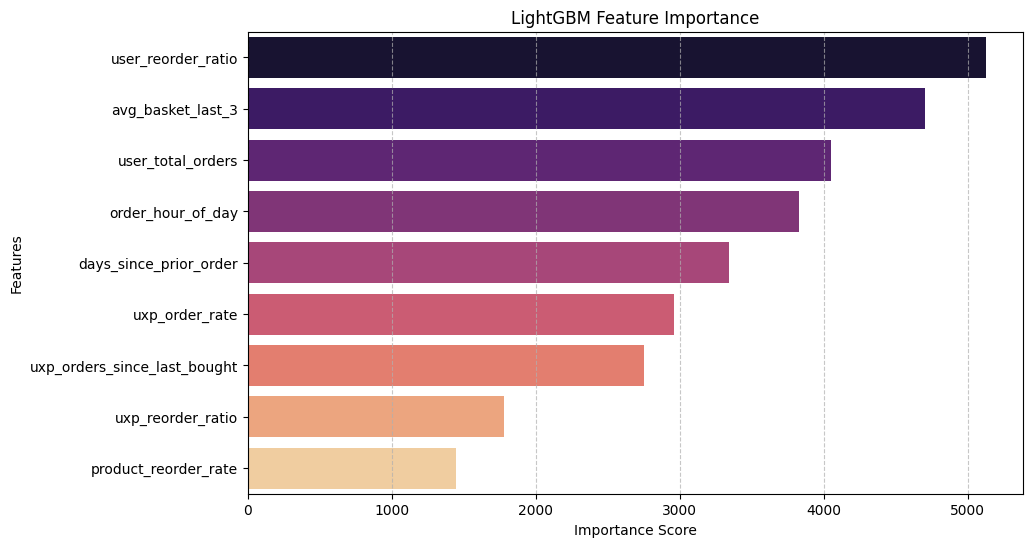

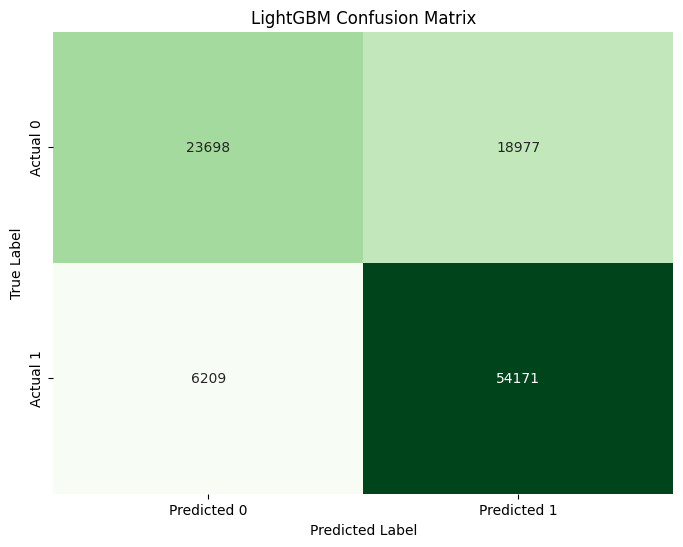

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# -------------------------------------------------------
# 1. رسمة أهمية الفيتشرز (معدلة لتسحب الأسماء من الموديل)
# -------------------------------------------------------
plt.figure(figsize=(10, 6))

# بنسحب القيم والأسماء من الموديل مباشرة عشان نتفادى الخطأ
importances = lgbm_model.feature_importances_
# هاي الحركة بتجيب الأسماء اللي الموديل شايفها فعلياً
feature_names = lgbm_model.feature_name_ 

# ترتيبهم بـ DataFrame
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# الرسم
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='magma')

plt.title('LightGBM Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# -------------------------------------------------------
# 2. الكونفيوجن ماتريكس (Confusion Matrix)
# -------------------------------------------------------
plt.figure(figsize=(8, 6))

# حساب الماتريكس
cm = confusion_matrix(yc_test, y_pred_final)

# الرسم
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('LightGBM Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
##################### حاولت ادوررررررررررررررررررررررررررر عافضل موديل توازن ترا بقدر انه اوصل الاكيورسي ل فوق ال خمس وثمنين بالراحة بس انه مع ليكج فهيك افضل حل وانسب اشي شفته

BOUNS AUTO ML 

CLASSIFICATION DONE ✅ TASK 1 ✅

Task B 

Regression

In [32]:
orders_level = (
    train_df
    .sort_values(["user_id", "order_number"])      
    .drop_duplicates("order_id", keep="last")      
    .copy()
)


target_users_count = 5000
unique_users = orders_level["user_id"].unique()

if target_users_count > len(unique_users):
    target_users_count = len(unique_users)

np.random.seed(42)
my_users = np.random.choice(unique_users, size=target_users_count, replace=False)

final_sample = orders_level[orders_level["user_id"].isin(my_users)].copy()
final_sample = final_sample.sort_values(by=["user_id", "order_number"])


final_sample["last__orders"] = (
    final_sample["order_number"]
    == final_sample.groupby("user_id")["order_number"].transform("max")
)

train_DF = final_sample[final_sample["last__orders"] == False].copy()
test_DF  = final_sample[final_sample["last__orders"] == True].copy()

y_col = "days_since_prior_order"

not_for_X_columns = [
    "eval_set", "last__orders", "order_id",
    "reordered", "add_to_cart_order",
    "order_number", y_col
]

xr_train = train_DF.drop(columns=not_for_X_columns + ["user_id"], errors="ignore")
yr_train = train_DF[y_col].astype("float32")

xr_test = test_DF.drop(columns=not_for_X_columns + ["user_id"], errors="ignore")
yr_test = test_DF[y_col].astype("float32")
real_num_col = xr_train.select_dtypes(include=["int32", "float32"]).columns.tolist()
real_num_col = [c for c in real_num_col if c not in id_cols]  

real_low_col_reg  = [c for c in low_cols  if c in xr_train.columns]   # low_cols عندك [file:105]
real_high_col_reg = [c for c in high_cols if c in xr_train.columns]   # high_cols عندك [file:105]

real_freq_col_reg = [c for c in Frequency_col if c in xr_train.columns]


preprocessor_reg = ColumnTransformer(
    transformers=[
        ("encoding", OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"), real_low_col_reg),
        ("target_encoding", ce.TargetEncoder(min_samples_leaf=20, smoothing=50), real_high_col_reg),
        ("frequency", ce.CountEncoder(normalize=True), real_freq_col_reg),
        ("scaling", StandardScaler(), real_num_col),
    ],
    remainder="drop"
)

# (اختياري) إذا بدك نفس مخرجاتك القديمة:
train_reg = preprocessor_reg.fit_transform(xr_train, yr_train)
test_reg  = preprocessor_reg.transform(xr_test)

In [36]:
from sklearn.model_selection import GroupKFold
np.random.seed(42)
tuning_xr = xr_train.copy()
tuning_yr = yr_train.copy()
gkf = GroupKFold(n_splits=5)

tuning_groups = train_DF["user_id"].copy()  

In [37]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model_score(model , xr_train , yr_train , xr_test , yr_test):
    model.fit(xr_train , yr_train)
    y_pred = model.predict(xr_test)
    
    mae = mean_absolute_error(yr_test , y_pred)
    print(f"MAE:  {mae}")
    
    rmse = np.sqrt(mean_squared_error(yr_test , y_pred))
    print(f"RMSE: {rmse}")

    r2 = r2_score(yr_test , y_pred)
    print(f"R2:   {r2}")
 

In [83]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
KNNRsmall_users = np.random.choice(tuning_groups.unique(), size=5000, replace=False)

mask = tuning_groups.isin(KNNRsmall_users)

KNNR_x_small = tuning_xr.loc[mask].copy()
KNNR_y_small = tuning_yr.loc[mask].copy()
KNNR_groups_small = tuning_groups.loc[mask].copy()

KNNR_pipline = make_pipeline(
    preprocessor_reg , 
    KNeighborsRegressor()
)

KNNRparan_grid = {
    "kneighborsregressor__n_neighbors": [7 , 10 , 20 , 50 , 100] ,
    "kneighborsregressor__weights" : ['distance' , 'uniform']
}

KNNR_grid_search = GridSearchCV(
    estimator = KNNR_pipline , 
    param_grid = KNNRparan_grid , 
    cv = gkf ,
    scoring = "r2" , 
    n_jobs = -1
)


KNNR_grid_search.fit(KNNR_x_small , KNNR_y_small , groups = KNNR_groups_small)

print("\nBest Score:" , KNNR_grid_search.best_score_)
print("Best Parameters:" , KNNR_grid_search.best_params_)


''' Best Score: 0.8155996109574376
Best Parameters: {'kneighborsregressor__n_neighbors': 10, 'kneighborsregressor__weights': 'distance'}'''


Best Score: 0.8131262295613709
Best Parameters: {'kneighborsregressor__n_neighbors': 10, 'kneighborsregressor__weights': 'distance'}


" Best Score: 0.8155996109574376\nBest Parameters: {'kneighborsregressor__n_neighbors': 10, 'kneighborsregressor__weights': 'distance'}"

In [84]:
best_Rk = KNNR_grid_search.best_params_["kneighborsregressor__n_neighbors"]
best_Rw = KNNR_grid_search.best_params_["kneighborsregressor__weights"]

final_KNNR_pip = make_pipeline(
    preprocessor_reg , 
    KNeighborsRegressor(n_neighbors = best_Rk , weights = best_Rw , n_jobs = -1)
)

model_score(final_KNNR_pip , xr_train , yr_train , xr_test , yr_test)

MAE:  2.4443853499608887
RMSE: 4.053206140083804
R2:   0.8502525648954093


Dicision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
DTRsmall_users = np.random.choice(tuning_groups.unique(), size=20000)
mask = tuning_groups.isin(DTRsmall_users)

DTR_x_small = tuning_xr.loc[mask].copy()
DTR_y_small = tuning_yr.loc[mask].copy()
DTR_groups_small = tuning_groups.loc[mask].copy()


DTR_pipline = make_pipeline(
    preprocessor_reg , 
    DecisionTreeRegressor(random_state = 42, max_features = 'sqrt')
)

DTRparam_grid = {
    "decisiontreeregressor__max_depth": [ 5,6,7,8] ,
    "decisiontreeregressor__min_samples_split": [ 20,40,60,100] ,
    "decisiontreeregressor__min_samples_leaf": [ 20,40,60,100] ,
}

DTR_grid_search = GridSearchCV(  
    estimator = DTR_pipline ,
    param_grid = DTRparam_grid , 
    cv = gkf ,
    scoring = "r2" , 
    n_jobs = -1
)

DTR_grid_search.fit(DTR_x_small, DTR_y_small, groups = DTR_groups_small)

print("\nBest Score:" , DTR_grid_search.best_score_)
print("Best Parameters:" , DTR_grid_search.best_params_)

'''Best Score: 1.0
Best Parameters: {'decisiontreeregressor__max_depth': None, 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_samples_split': 2}'''

'''Best Score: 0.8430518984861892
Best Parameters: {'decisiontreeregressor__max_depth': 10, 'decisiontreeregressor__min_samples_leaf': 20, 'decisiontreeregressor__min_samples_split': 2}
max_features = 'sqrt' -> بس لسا overfitting'''

'''Best Score: 0.7801776247819185
Best Parameters: {'decisiontreeregressor__max_depth': 8, 'decisiontreeregressor__min_samples_leaf': 20, 'decisiontreeregressor__min_samples_split': 15}'''

'''Best Score: 0.7795601860638872
Best Parameters: {'decisiontreeregressor__max_depth': 8, 'decisiontreeregressor__min_samples_leaf': 100, 'decisiontreeregressor__min_samples_split': 20}'''


Best Score: 0.7795601860638872
Best Parameters: {'decisiontreeregressor__max_depth': 8, 'decisiontreeregressor__min_samples_leaf': 100, 'decisiontreeregressor__min_samples_split': 20}


"Best Score: 0.7801776247819185\nBest Parameters: {'decisiontreeregressor__max_depth': 8, 'decisiontreeregressor__min_samples_leaf': 20, 'decisiontreeregressor__min_samples_split': 15}"

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
best_RMD = DTR_grid_search.best_params_["decisiontreeregressor__max_depth"]
best_RMSS = DTR_grid_search.best_params_[ "decisiontreeregressor__min_samples_split"]
best_RMSL = DTR_grid_search.best_params_["decisiontreeregressor__min_samples_leaf"]

final_DTR_pip = make_pipeline(
    preprocessor_reg ,
    DecisionTreeRegressor(max_depth = best_RMD , min_samples_leaf = best_RMSL ,
                           min_samples_split = best_RMSS , random_state = 42,max_features='sqrt')
)

model_score(final_DTR_pip , xr_train , yr_train , xr_test , yr_test)





MAE:  3.450722543365734
RMSE: 5.728606943451895
R2:   0.7008699395012474


RANDOM FOREST REGRRESION

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import  RandomForestRegressor
gkf = GroupKFold(n_splits=3)


RFRsmall_users = np.random.choice(tuning_groups.unique(), size=2000, replace=False)
mask = tuning_groups.isin(RFRsmall_users)

RFR_x_small = tuning_xr.loc[mask].copy()
RFR_y_small = tuning_yr.loc[mask].copy()
RFR_groups_small = tuning_groups.loc[mask].copy()

RFR_pipline = make_pipeline(
    preprocessor_reg ,
    RandomForestRegressor(random_state = 42 , n_jobs = -1)
)

RFRparam_grid = {
    "randomforestregressor__n_estimators": [100 , 150 , 200],
    "randomforestregressor__max_depth": [None , 10 , 20],
    "randomforestregressor__min_samples_leaf": [1, 2, 5] ,
    "randomforestregressor__min_samples_split": [2 , 5 , 10]
}

RFR_grid_search = GridSearchCV(
    estimator = RFR_pipline ,
    param_grid = RFRparam_grid ,
    cv = gkf ,
    scoring = "r2" ,
    n_jobs = -1
)

RFR_grid_search.fit(RFR_x_small, RFR_y_small, groups = RFR_groups_small)

print("\nBest Score:" , RFR_grid_search.best_score_)
print("Best Parameters:" , RFR_grid_search.best_params_)

In [ ]:
best_N = RFR_grid_search.best_params_["randomforestregressor__n_estimators"]
best_MD = RFR_grid_search.best_params_[ "randomforestregressor__max_depth"]
best_MSL = RFR_grid_search.best_params_["randomforestregressor__min_samples_leaf"]
best_MSS = RFR_grid_search.best_params_["randomforestregressor__min_samples_split"]

final_RFR_pipeline = make_pipeline(
    preprocessor_reg ,
    RandomForestRegressor(n_estimators = best_N , max_depth = best_MD ,
                    min_samples_leaf =best_MSL , min_samples_split = best_MSS ,
                    n_jobs = -1 , random_state = 42
                        )
)


model_score(final_RFR_pipeline , xr_train , yr_train , xr_test , yr_test) 

r2_train = final_RFR_pipeline.score(xr_train, yr_train)

print(f"training R2: {r2_train}")


SVM